In [1]:
# p43 (p64 PDF) 

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

c:\Users\duyni\miniconda3\envs\qiskit_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Chapter 8 - Terra

In [2]:
# p179 (p200 PDF) 

# Import registers
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, 'my_Q')
cr = ClassicalRegister(2, 'my_C')
qc = QuantumCircuit(qr,cr)
qc.draw()


my_Q_0: 
        
my_Q_1: 
        
my_C: 2/

In [3]:
# p180 (p201 PDF) 

qc = QuantumCircuit(QuantumRegister(2, 'my_Q'), ClassicalRegister(2, 'my_C'))

In [4]:
# p180 (p201 PDF) 

#Import the register classes
from qiskit import QuantumRegister, ClassicalRegister
#Create the quantum and classical registers, each with labels
qr1 = QuantumRegister(2, name='qr1')
cr1 = ClassicalRegister(2, name='cr1')
#Create the quantum circuit using the registers
qc1 = QuantumCircuit(qr1, cr1)
#Draw the circuit
qc1.draw()


qr1_0: 
       
qr1_1: 
       
cr1: 2/

In [5]:
# p181 (p202 PDF) 

#Create two Quantum and Classical registers
qr2 = QuantumRegister(2, name='qr2')
cr2 = ClassicalRegister(2, name='cr2')
#Create a second circuit using the registers created above
qc2 = QuantumCircuit(qr2, cr2)
#Draw the second quantum circuit
qc2.draw()


qr2_0: 
       
qr2_1: 
       
cr2: 2/

In [6]:
# p181 (p202 PDF) 

#Concatenate the two previous circuits to create a new circuit
qc_combined = qc1 + qc2
#Draw the concatenated circuit
qc_combined.draw()


qr1_0: 
       
qr1_1: 
       
qr2_0: 
       
qr2_1: 
       
cr1: 2/
       
cr2: 2/

In [7]:
# p182 (p203 PDF) 

#Import the random_circuit class
from qiskit.circuit.random import random_circuit
#Construct the random circuit with the number of qubits = 3
#with a depth = 2, and include the measurement operator for each qubit
qc = random_circuit(3, 2, measure=True)
#Draw the circuit
qc.draw()


┌───┐┌───────────────────┐┌─┐      
q_0: ┤ X ├┤ U2(3.2875,4.8681) ├┤M├──────
     ├───┤└───────┬───┬───────┘└╥┘┌─┐   
q_1: ┤ I ├────────┤ I ├─────────╫─┤M├───
     ├───┤    ┌───┴───┴────┐    ║ └╥┘┌─┐
q_2: ┤ S ├────┤ RX(5.7239) ├────╫──╫─┤M├
     └───┘    └────────────┘    ║  ║ └╥┘
c: 3/═══════════════════════════╩══╩══╩═
                                0  1  2

In [8]:
# p184 (p205 PDF) 

# Import the random circuit class
from qiskit.circuit.random import random_circuit
#Create two random circuits, each with 2 qubit registers and random #gate operator counts.
qc1 = random_circuit(2,2)
qc2 = random_circuit(2,4)
#Concatenate the two random circuits
qc = qc1 + qc2
#Draw the circuit
qc.draw()


┌─────┐┌────────────┐┌────────────┐┌────────────┐┌───────────────────┐»
q_0: ┤ TDG ├┤ RY(4.6447) ├┤ RZ(1.0426) ├┤ RZ(4.6935) ├┤ U2(3.4577,6.2688) ├»
     └┬───┬┘└───┬───┬────┘└─────┬──────┘└──┬─────┬───┘└───┬────────────┬──┘»
q_1: ─┤ Z ├─────┤ S ├───────────■──────────┤ SDG ├────────┤ RZ(5.2963) ├───»
      └───┘     └───┘                      └─────┘        └────────────┘   »
«               ┌───┐          
«q_0: ──────────┤ T ├──────────
«     ┌─────────┴───┴─────────┐
«q_1: ┤ U3(5.9574,5.278,1.89) ├
«     └───────────────────────┘

In [9]:
# p184 (p205 PDF) 

#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width()
    depth = qc.depth()
    num_operators = qc.count_ops()
    circuit_size = qc.size()
    print('Width = ',width) 
    print('Depth = ', depth)
    print('Circuit size = ',circuit_size)
    print('Number of operators = ', num_operators)


In [10]:
# p185 (p206 PDF) 

#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)


Width =  2
Depth =  6
Circuit size =  11
Number of operators =  OrderedDict([('rz', 2), ('z', 1), ('tdg', 1), ('ry', 1), ('s', 1), ('crz', 1), ('sdg', 1), ('u2', 1), ('u3', 1), ('t', 1)])


In [11]:
# p185 (p206 PDF) 

#Use measure_all() to automatically add the barrier, measurement, and #classical register to our existing circuit.
qc.measure_all()
#Draw the circuit
qc.draw()


┌─────┐┌────────────┐┌────────────┐┌────────────┐┌───────────────────┐»
   q_0: ┤ TDG ├┤ RY(4.6447) ├┤ RZ(1.0426) ├┤ RZ(4.6935) ├┤ U2(3.4577,6.2688) ├»
        └┬───┬┘└───┬───┬────┘└─────┬──────┘└──┬─────┬───┘└───┬────────────┬──┘»
   q_1: ─┤ Z ├─────┤ S ├───────────■──────────┤ SDG ├────────┤ RZ(5.2963) ├───»
         └───┘     └───┘                      └─────┘        └────────────┘   »
meas: 2/══════════════════════════════════════════════════════════════════════»
                                                                              »
«                  ┌───┐           ░ ┌─┐   
«   q_0: ──────────┤ T ├───────────░─┤M├───
«        ┌─────────┴───┴─────────┐ ░ └╥┘┌─┐
«   q_1: ┤ U3(5.9574,5.278,1.89) ├─░──╫─┤M├
«        └───────────────────────┘ ░  ║ └╥┘
«meas: 2/═════════════════════════════╩══╩═
«                                     0  1

In [12]:
# p186 (p207 PDF) 

#Print out the circuit properties
print_circuit_props(qc)


Width =  4
Depth =  7
Circuit size =  13
Number of operators =  OrderedDict([('rz', 2), ('measure', 2), ('z', 1), ('tdg', 1), ('ry', 1), ('s', 1), ('crz', 1), ('sdg', 1), ('u2', 1), ('u3', 1), ('t', 1), ('barrier', 1)])


In [13]:
# p187 (p208 PDF) 

qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [14]:
# p187 (p208 PDF) 

#Print out the circuit properties
print_circuit_props(qc)


Width =  3
Depth =  1
Circuit size =  1
Number of operators =  OrderedDict([('ccx', 1)])


In [15]:
# p188 (p209 PDF) 

#Print out the circuit properties
print_circuit_props(qc.decompose())


Width =  3
Depth =  11
Circuit size =  15
Number of operators =  OrderedDict([('cx', 6), ('t', 4), ('tdg', 3), ('h', 2)])


# Customization and Parameterization of circuits

In [16]:
# p189 (p210 PDF) 

#Create a custom two-qubit composite gate
#Create the quantum register
qr = QuantumRegister(2, name='qr_c')
#Generate quantum circuit which will make up the composite gate
comp_qc = QuantumCircuit(qr, name='my-composite')
#Add any gates you wish to your composite gate
comp_qc.h(0)
comp_qc.cx(0, 1)
#Create the composite instructions by converting 
#the QuantumCircuit to a list of Instructions
composite_inst = comp_qc.to_instruction()
#Draw the circuit which will represent the composite gate
comp_qc.draw()


┌───┐     
qr_c_0: ┤ H ├──■──
        └───┘┌─┴─┐
qr_c_1: ─────┤ X ├
             └───┘

In [17]:
# p189 (p210 PDF) 

#Create your 2-qubit circuit to generate your composite gate
qr2 = QuantumRegister(3, 'qr')
#Create a quantum circuit using the quantum register
qc = QuantumCircuit(qr2)
#Add any arbitrary gates that would represent the function 
#of the composite gate 
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
#Draw the composite circuit
qc.draw()


┌───┐          
qr_0: ┤ H ├──■────■──
      └───┘┌─┴─┐  │  
qr_1: ─────┤ X ├──┼──
           └───┘┌─┴─┐
qr_2: ──────────┤ X ├
                └───┘

In [18]:
# p190 (p211 PDF) 

#Append your composite gate to the specified qubits. 
qc.append(composite_inst, [qr2[0], qr2[1]])
#Draw the complete circuit
qc.draw()


┌───┐          ┌───────────────┐
qr_0: ┤ H ├──■────■──┤0              ├
      └───┘┌─┴─┐  │  │  my-composite │
qr_1: ─────┤ X ├──┼──┤1              ├
           └───┘┌─┴─┐└───────────────┘
qr_2: ──────────┤ X ├─────────────────
                └───┘

In [19]:
# p191 (p212 PDF) 

#Import the Parameter object
from qiskit.circuit import Parameter
#Construct the Parameter set to Theta
param_theta = Parameter('θ')
#Create a two-qubit quantum circuit and add some gates
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
#Include a rotation gate which we wish to apply 
#the Parameter value 
qc.rz(param_theta,0)
qc.rz(param_theta,1)
#Draw the circuit
qc.draw()


┌───┐     ┌───────┐
q_0: ┤ H ├──■──┤ RZ(θ) ├
     └───┘┌─┴─┐├───────┤
q_1: ─────┤ X ├┤ RZ(θ) ├
          └───┘└───────┘

In [20]:
# p192 (p213 PDF) 

import numpy as np
#Bind the parameters with a value, in this case 2π
qc = qc.bind_parameters({param_theta: 2*np.pi})
#Draw the circuit with the set parameter values
qc.draw()


┌───┐     ┌─────────┐
q_0: ┤ H ├──■──┤ RZ(2pi) ├
     └───┘┌─┴─┐├─────────┤
q_1: ─────┤ X ├┤ RZ(2pi) ├
          └───┘└─────────┘

# Generating Pulse schedules on quantum hardware

In [21]:
# p193 (p214 PDF) 

#Import pulse classes
from qiskit.pulse import SamplePulse, DriveChannel, Play, Schedule
#Import some helpful utils
from qiskit.scheduler.utils import measure_all


c:\Users\duyni\miniconda3\envs\qiskit_env\lib\site-packages\qiskit\pulse\library\sample_pulse.py:44: DeprecationWarning: SamplePulse has been renamed to Waveform and is deprecated. Please replace SamplePulse(samples, channel) with Waveform(samples, channel).
  "Waveform(samples, channel).", DeprecationWarning)


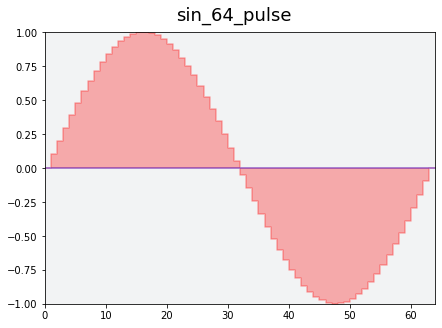

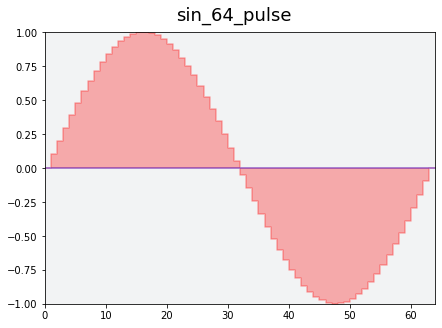

In [22]:
# p195 (p216 PDF) 

#Import numpy and generate the sin sample values
import numpy as np
x = np.linspace(0,2*np.pi,64)
data = np.sin(x)
#Generate our SamplePulse 
sample_pulse = SamplePulse(data, name="sin_64_pulse")
#Draw the generated sample pulse
sample_pulse.draw()


C:\Users\duyni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: the pulse_lib module is deprecated, pulse_lib is renamed to library
  


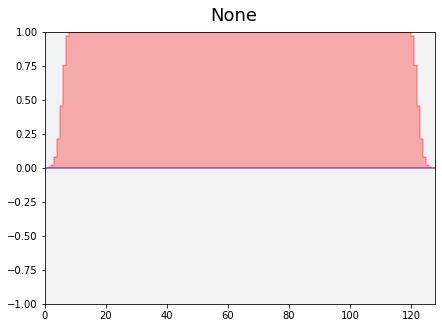

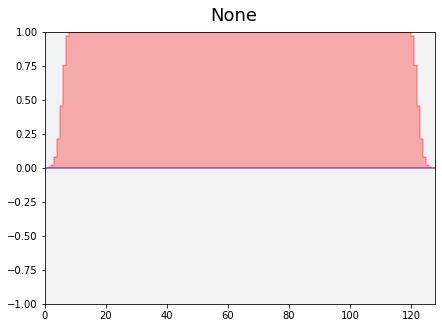

In [23]:
# p196 (p217 PDF) 

#Import the Gaussian Square pulse from Pulse Library
from qiskit.pulse.pulse_lib import GaussianSquare
#Create a Gaussian Square pulse: 
#Args: duration, amp, sigma, width, name
gaussian_square_pulse = GaussianSquare(128,1,2,112, "gaussian square")
gaussian_square_pulse.draw()


# Generating and executing Schedules

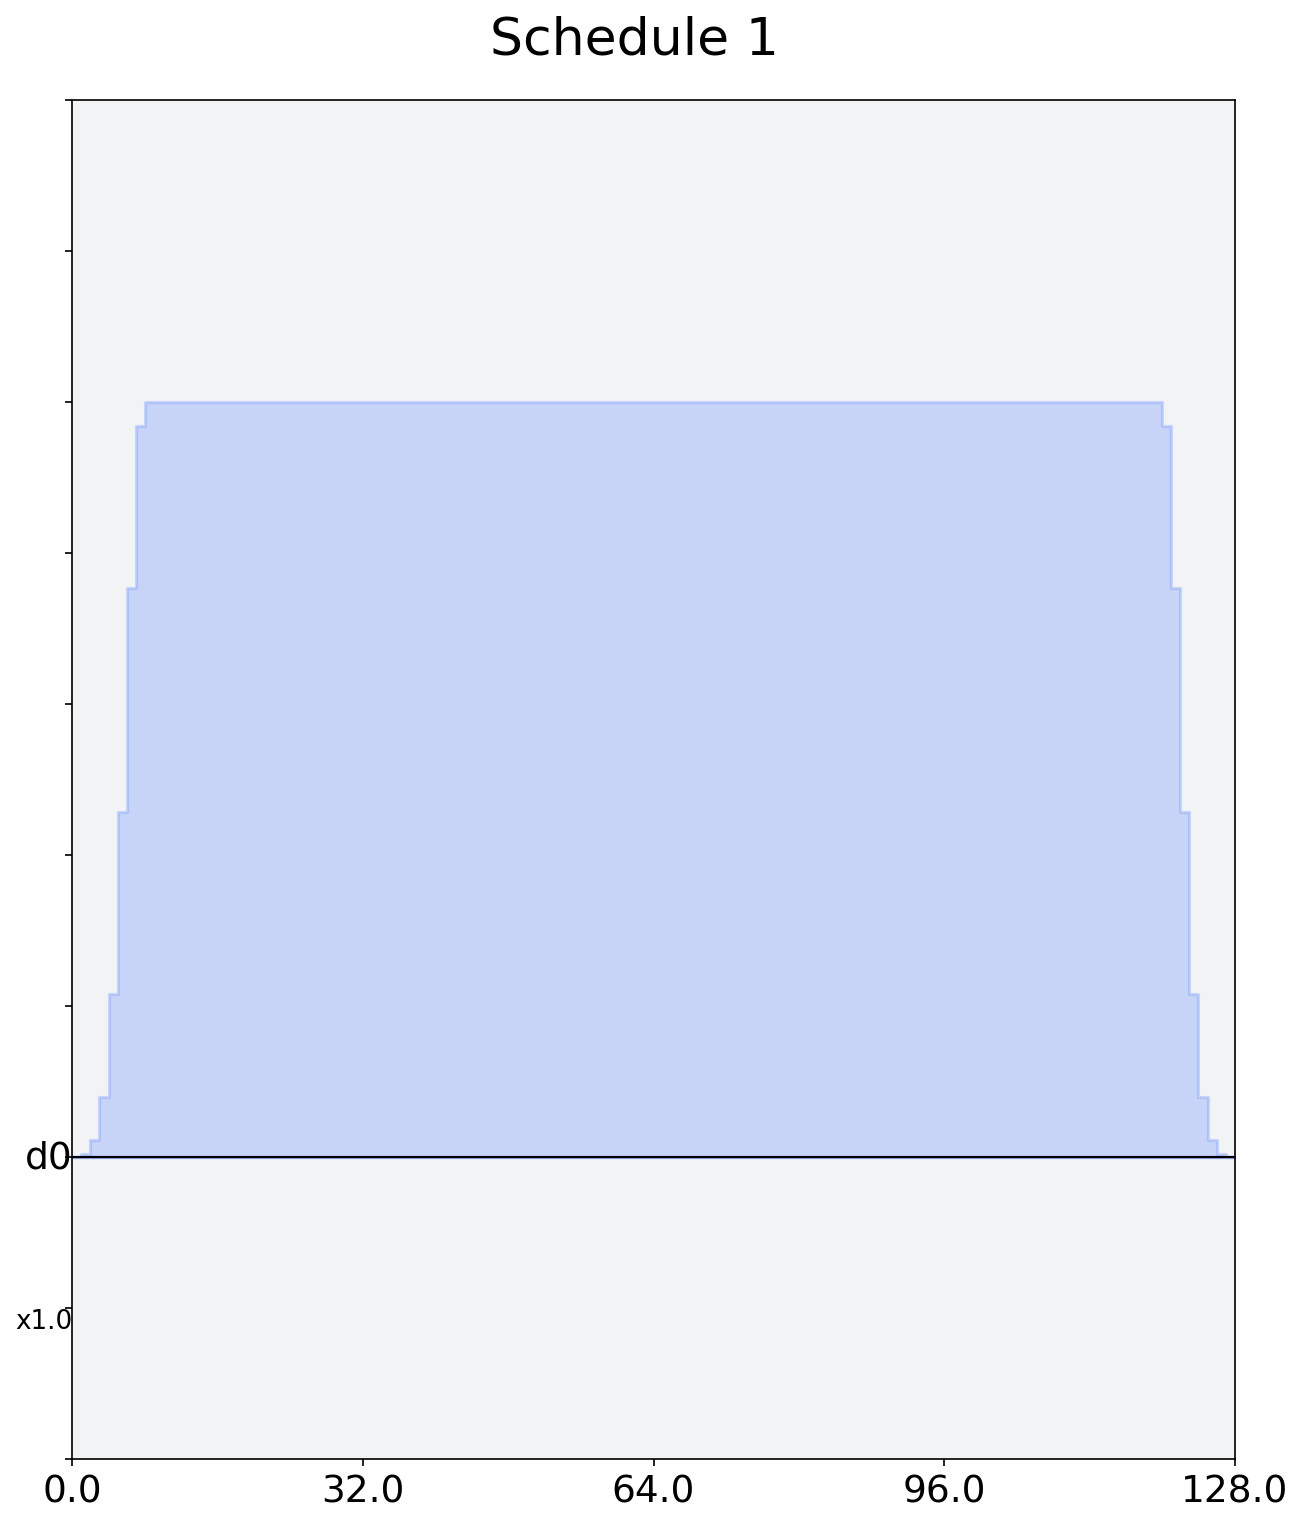

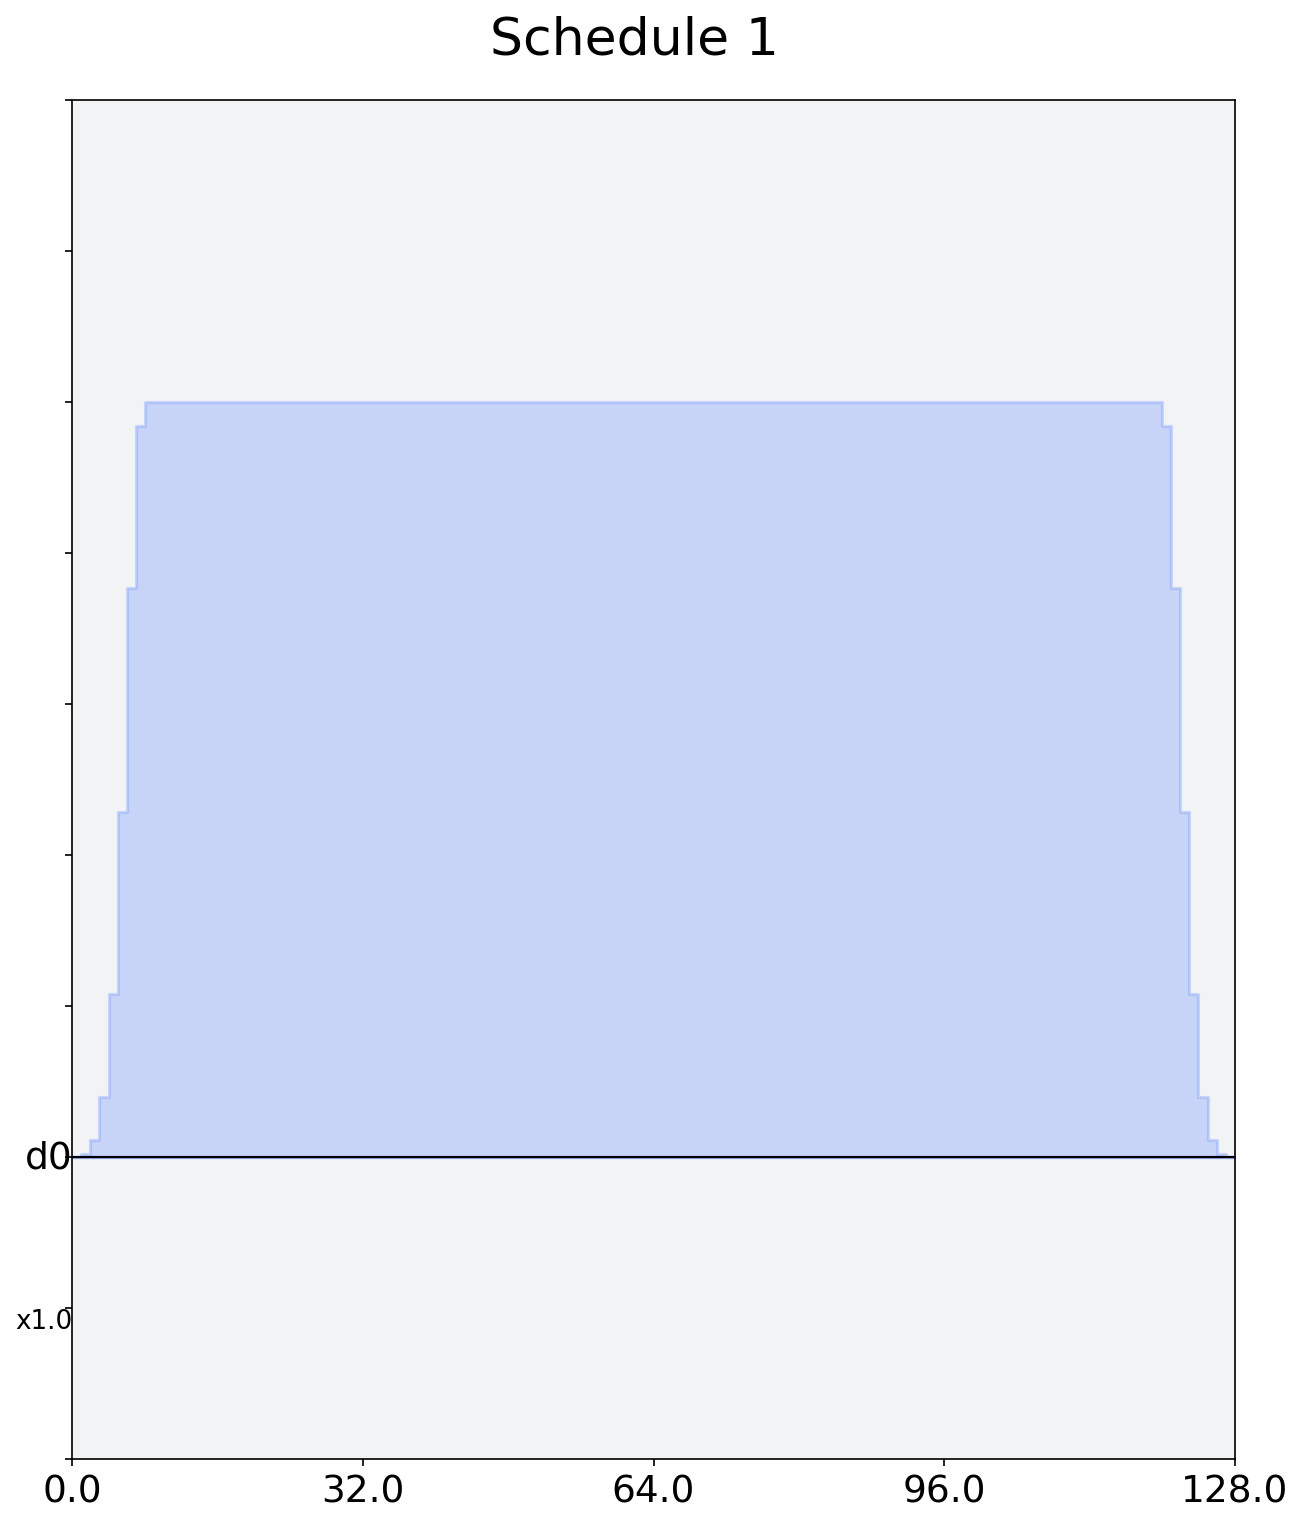

In [24]:
# p198 (p219 PDF) 

#Create the first schedule with our Gaussian Square pulse
schedule_1 = Schedule(name='Schedule 1')
schedule_1 = schedule_1.insert(0, Play(gaussian_square_pulse, DriveChannel(0)))
#Draw the schedule
schedule_1.draw()


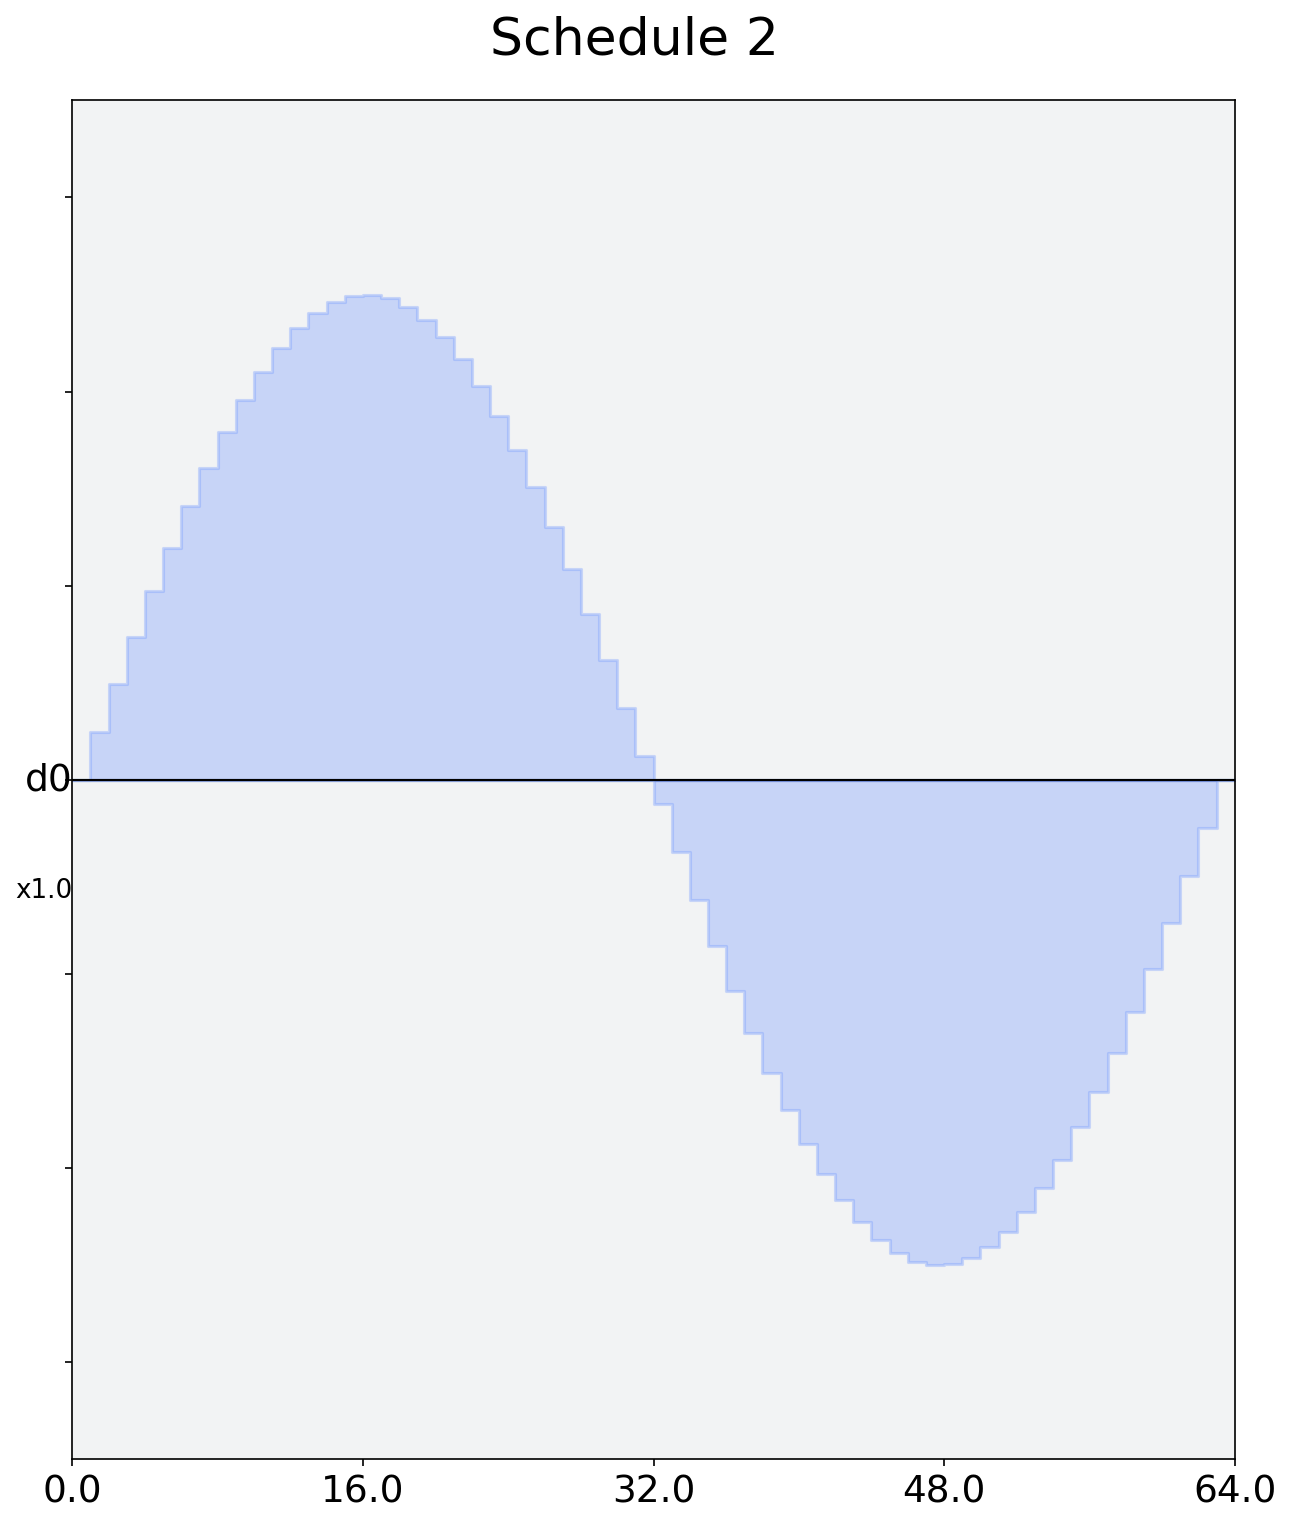

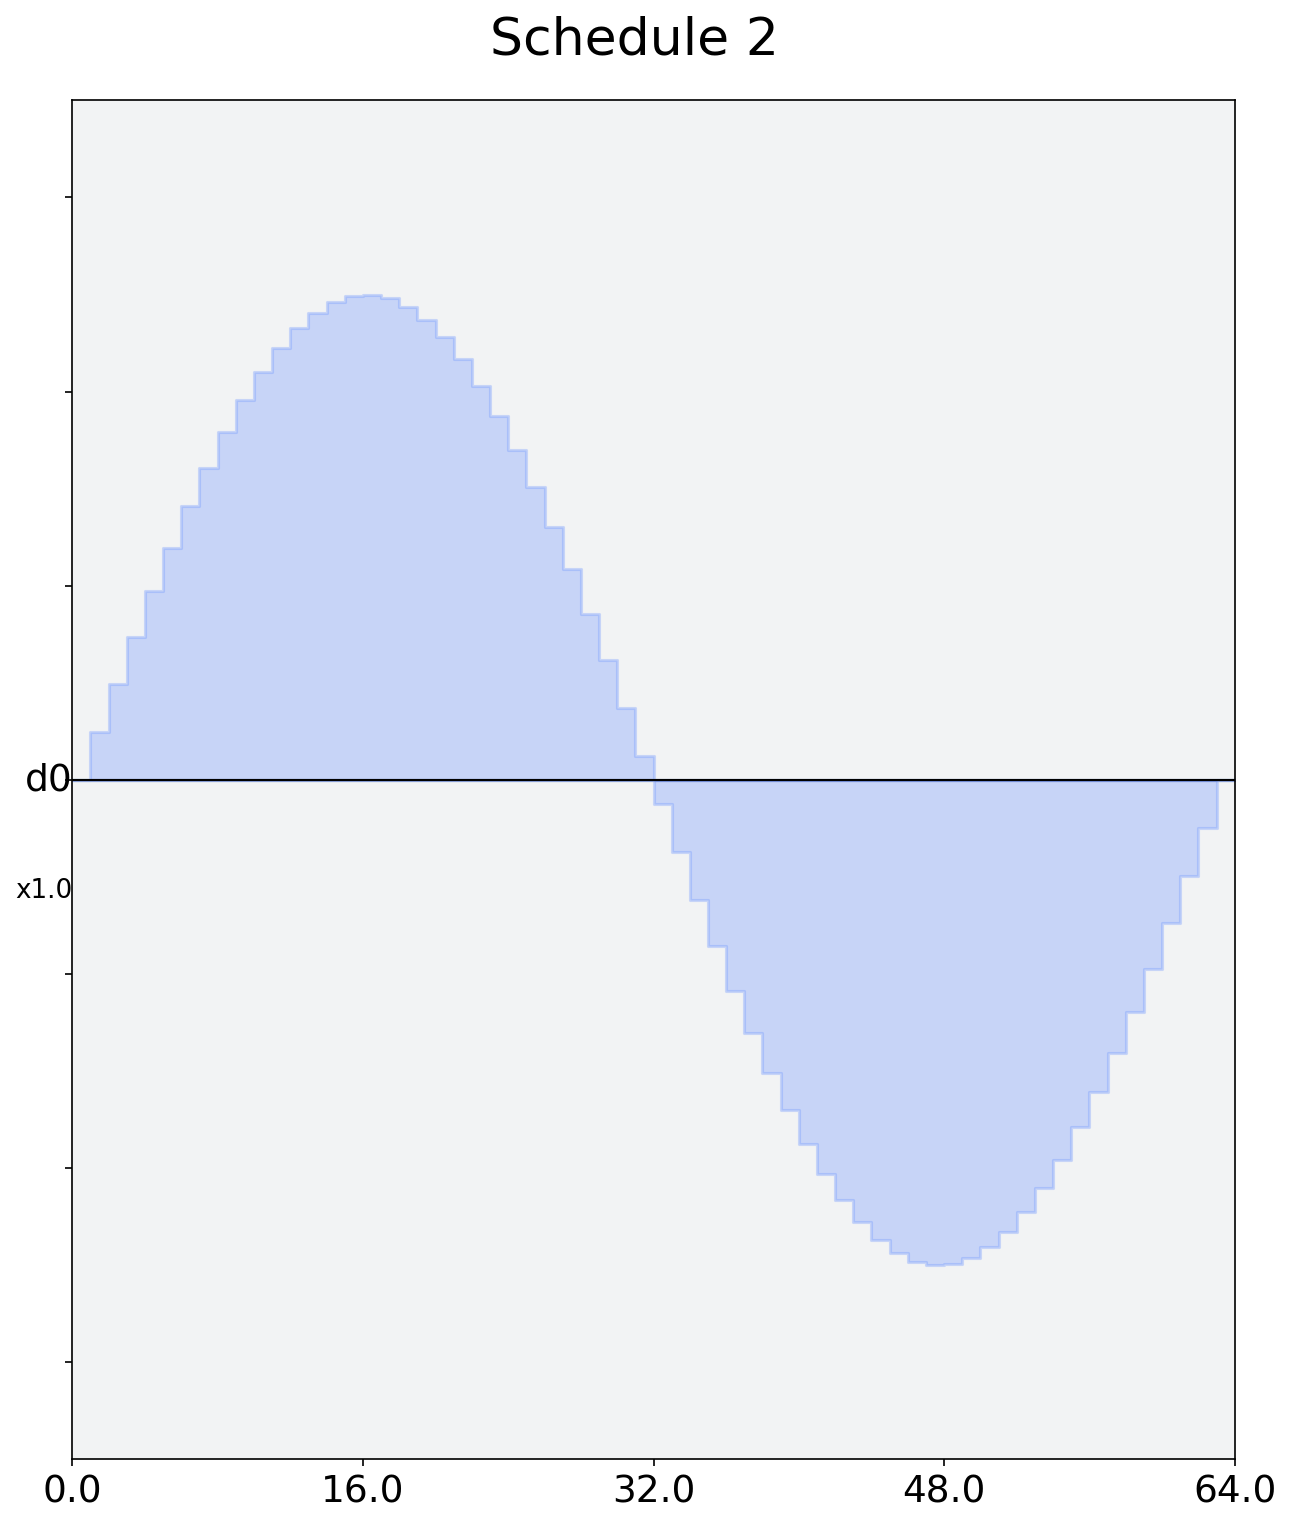

In [25]:
# p199 (p220 PDF)

#Create a second schedule with our sample pulse
schedule_2 = Schedule(name='Schedule 2')
schedule_2 = schedule_2.insert(0, Play(sample_pulse, DriveChannel(0)))
#Draw the schedule
schedule_2.draw()


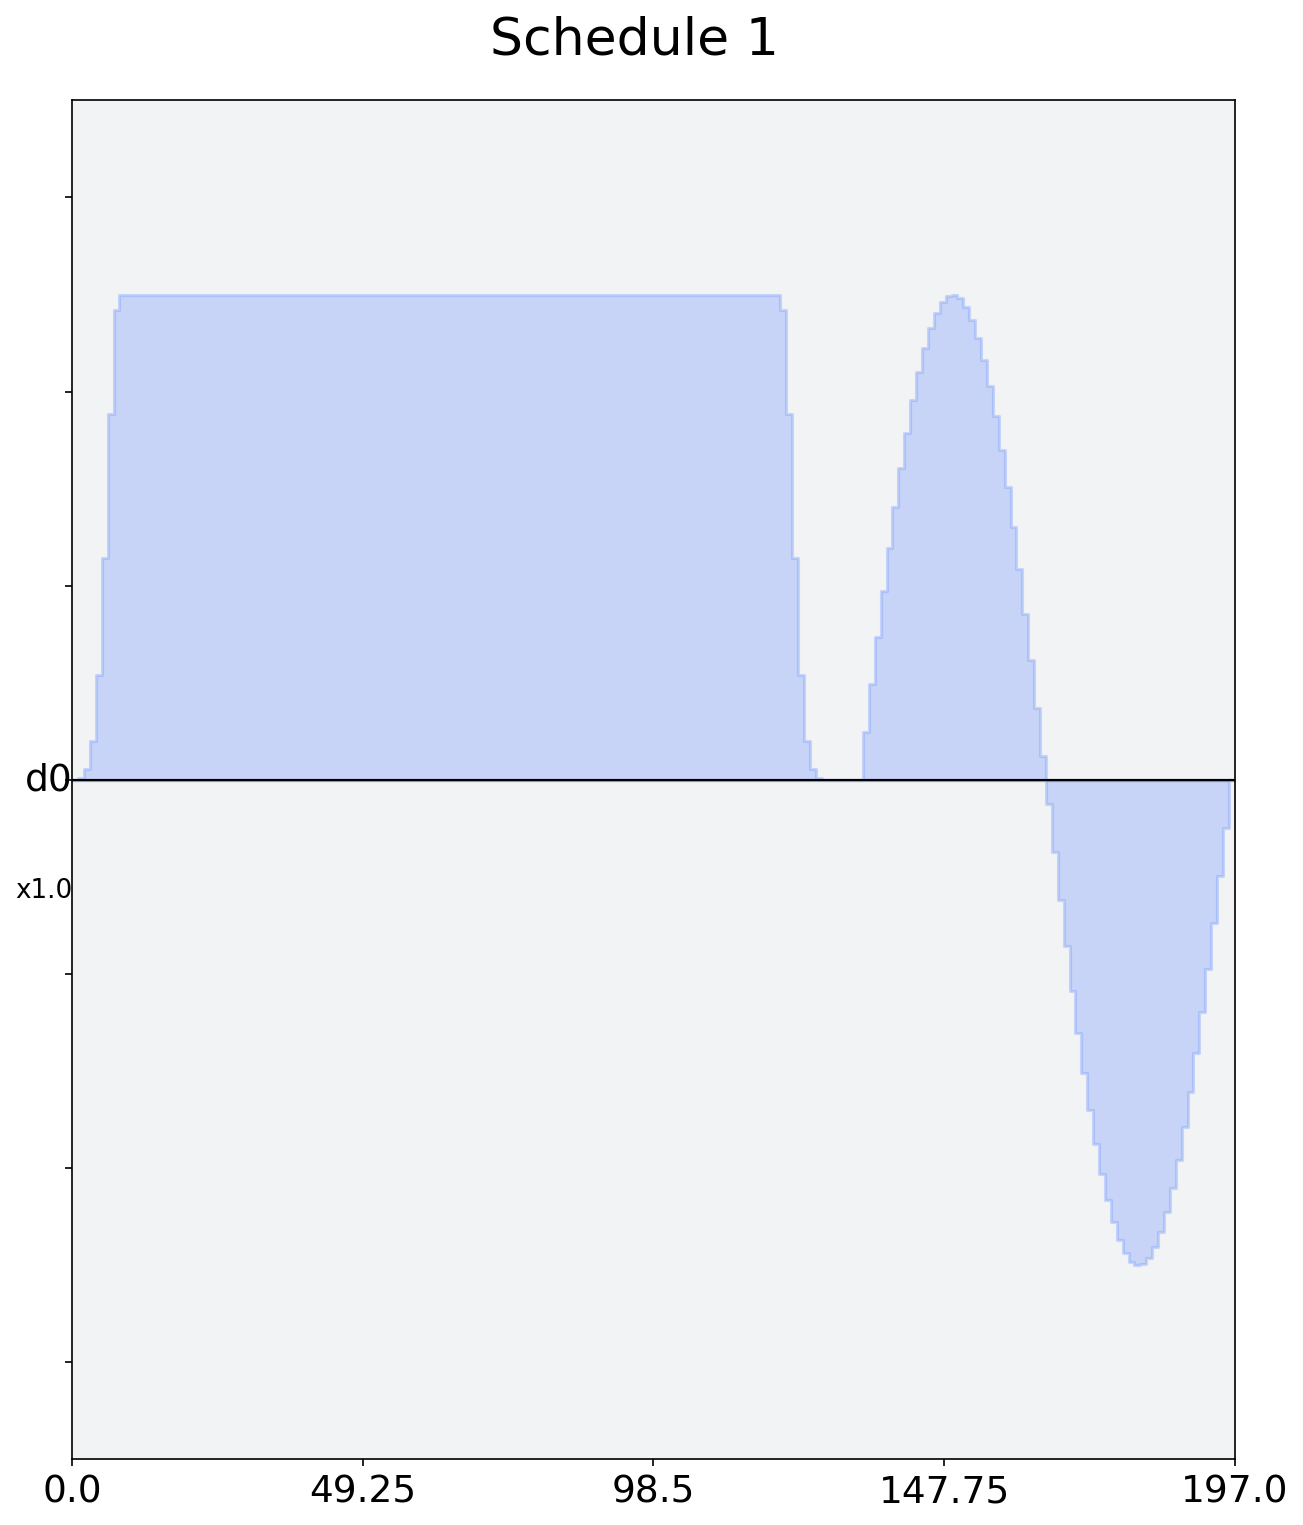

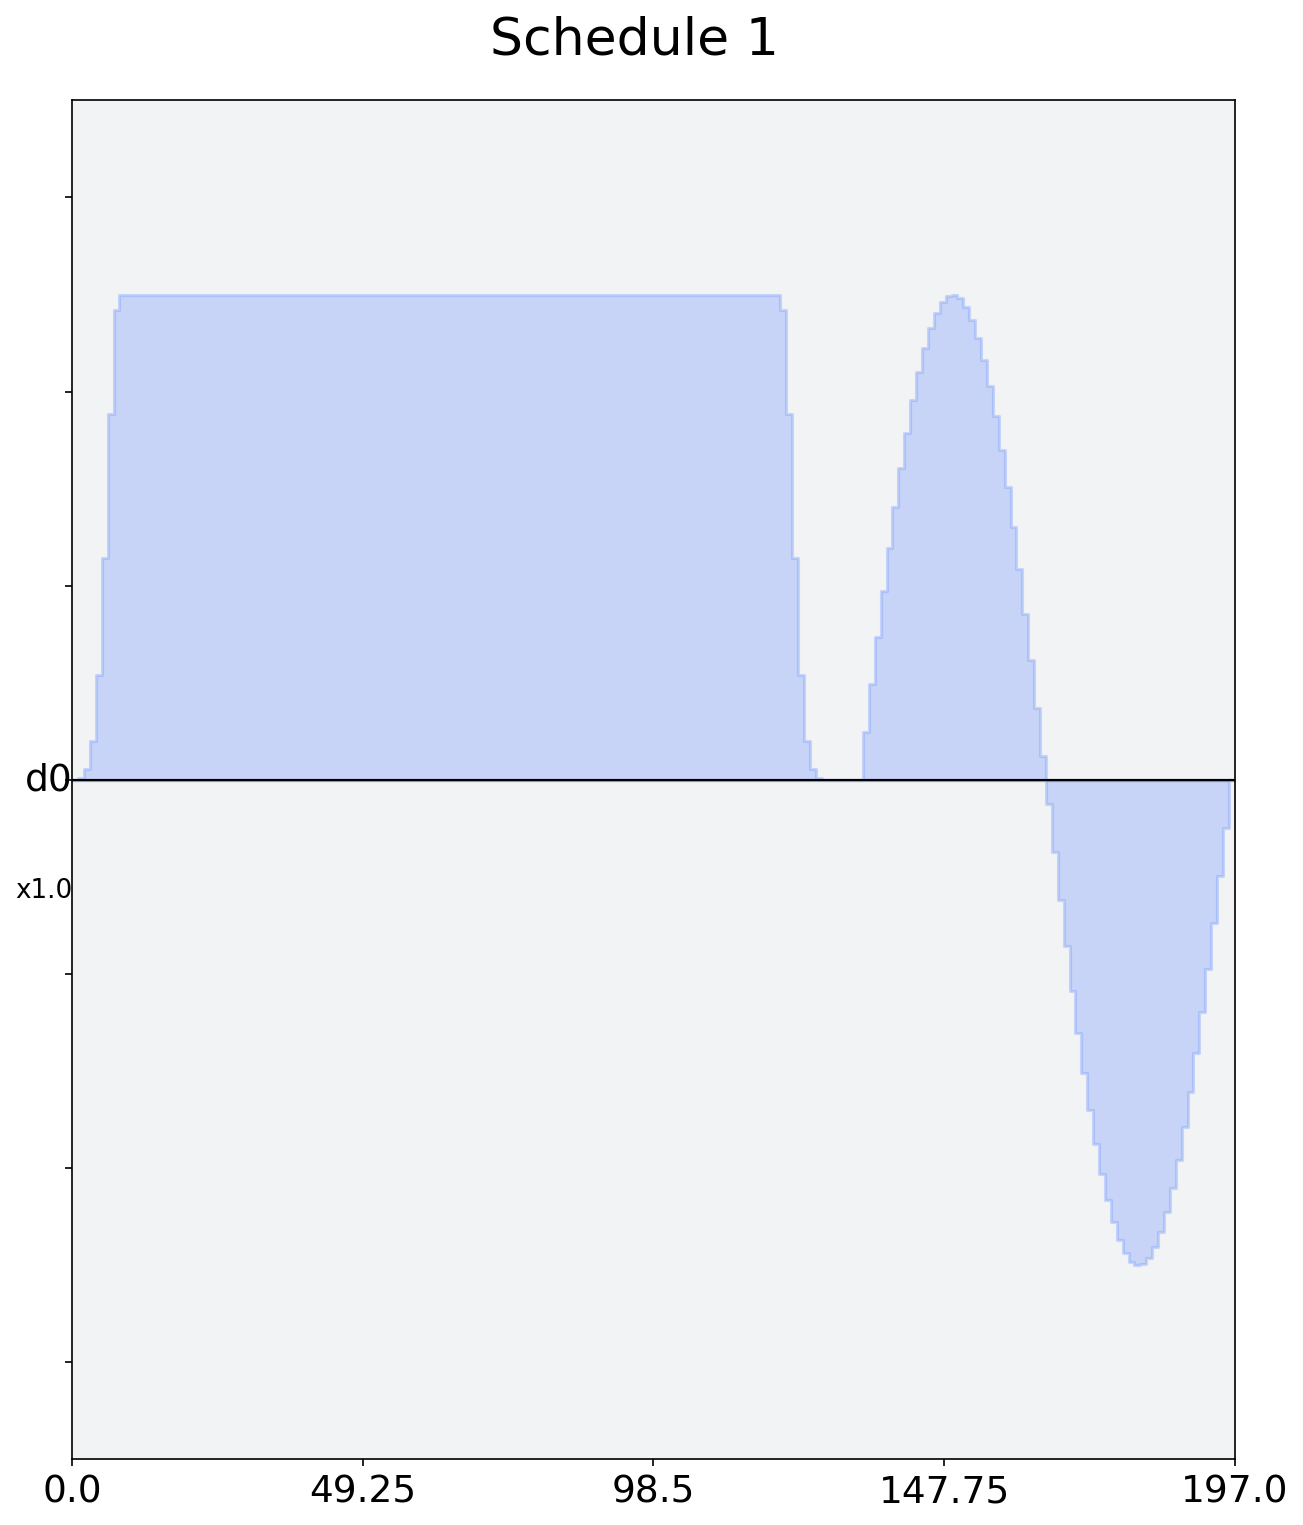

In [26]:
# p200 (p221 PDF)

#Let's create a third schedule 
#Where we add the first schedule and second schedules
#And shift the second to the right by a time of 5 after the first
schedule_3 = schedule_1.insert(schedule_1.duration+5, schedule_2)
schedule_3.draw()


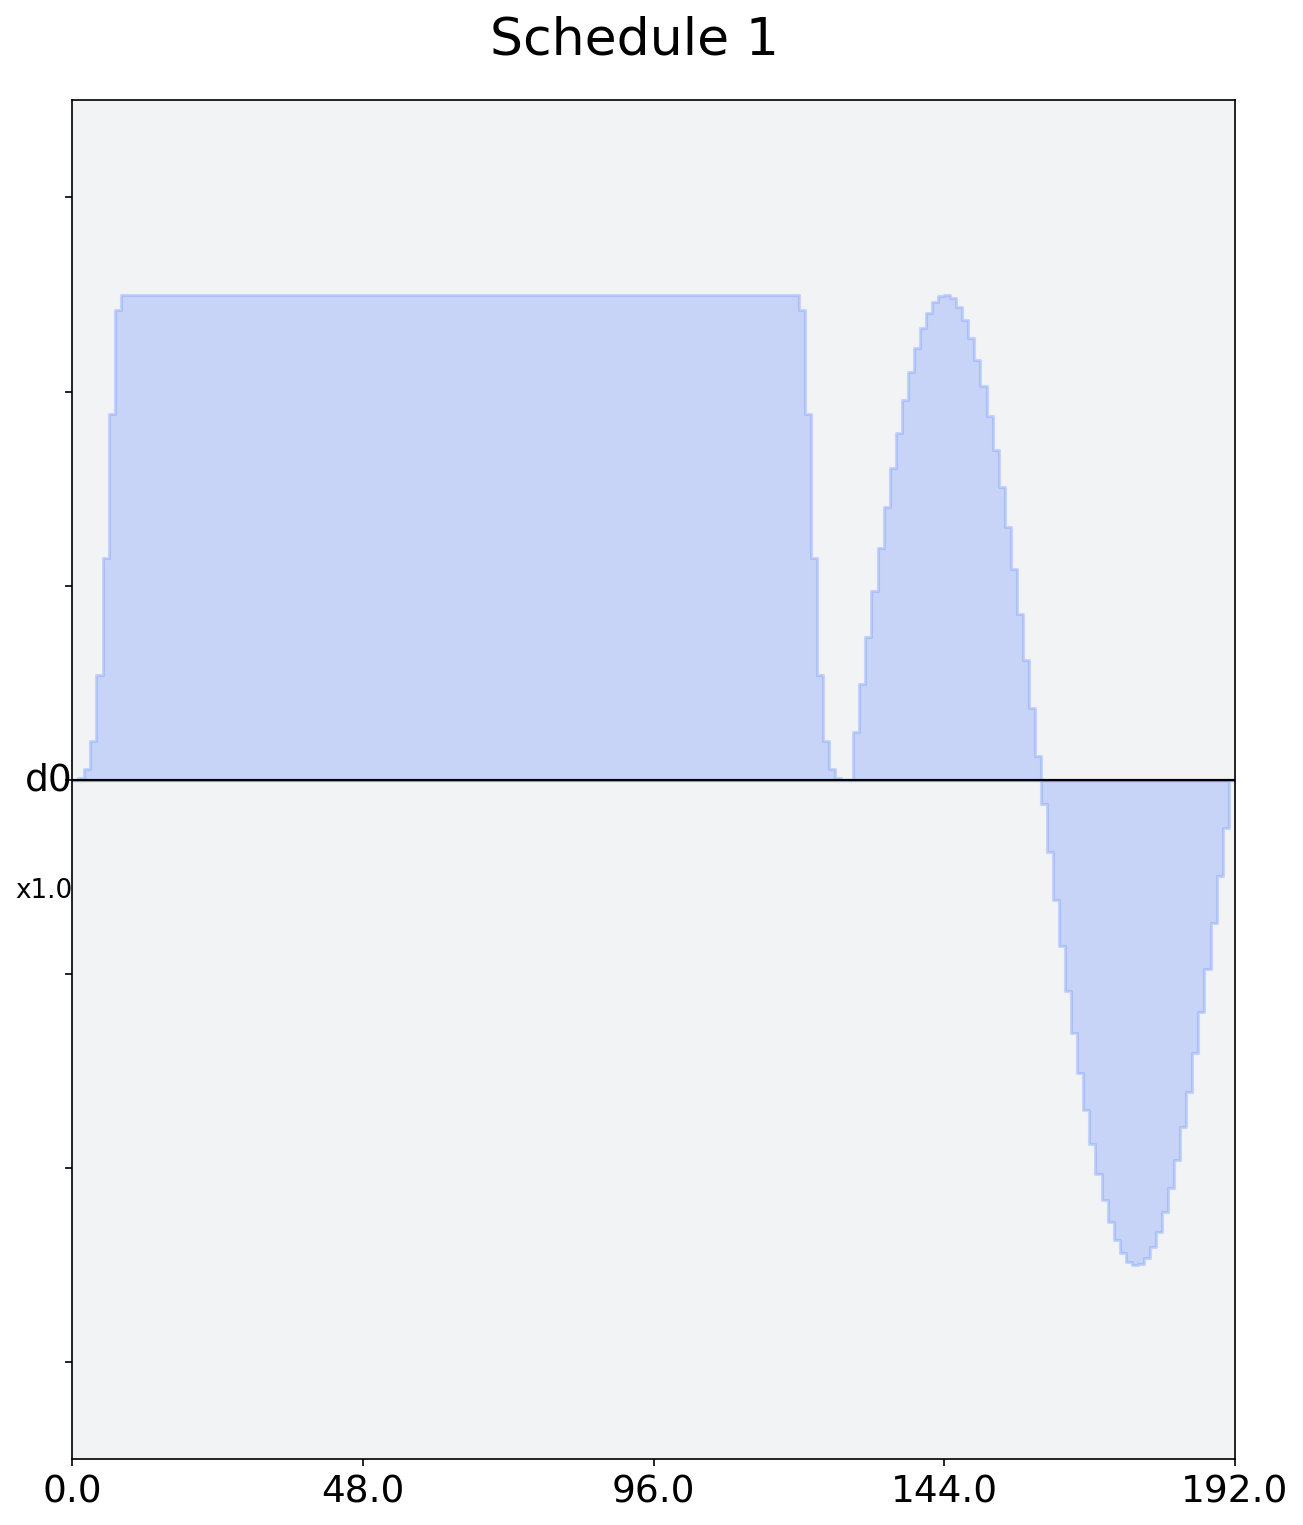

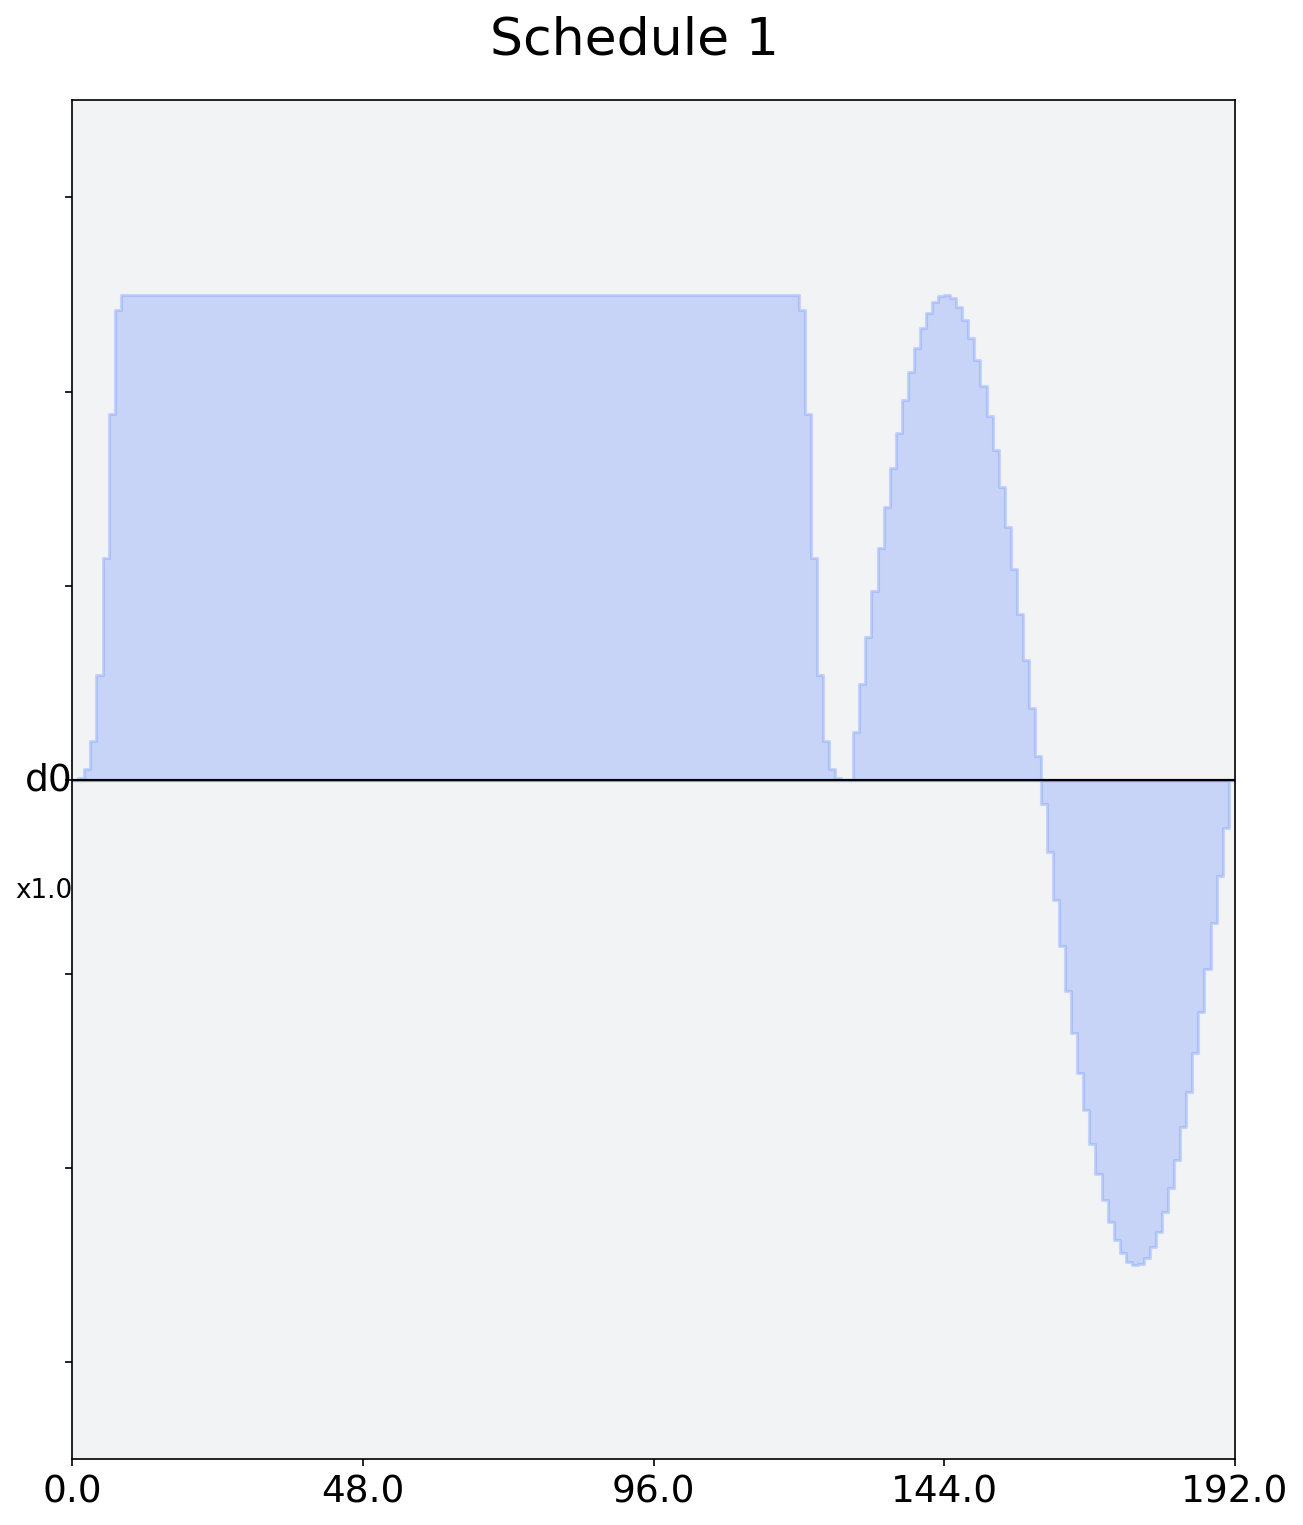

In [27]:
# p201 (p222 PDF)

#We could have also combined the two using the append operator
#The two schedules are appended immediately after one another
schedule_3_append = schedule_1.append(schedule_2)
schedule_3_append.draw()


# Scheduling existing quantum circuits

In [28]:
# p202 (p223 PDF)

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0,0)
#Draw the circuit
qc.draw()


┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [30]:
# p202 (p223 PDF)

#Import transpile and schedule
from qiskit import transpile, schedule 
#Set the backend to ibmq_armonk
backend = provider.get_backend('ibm_brisbane')
#Transpile the circuit using basis gates from the specified backend
transpiled_qc = transpile(qc, backend)  
#Draw the transpiled circuit
transpiled_qc.draw()


┌──────────┐┌────┐┌────────┐┌────┐┌─────────┐┌────┐»
          q_0 -> 0 ┤ RZ(pi/2) ├┤ √X ├┤ RZ(pi) ├┤ √X ├┤ RZ(3pi) ├┤ √X ├»
                   └──────────┘└────┘└────────┘└────┘└─────────┘└────┘»
    ancilla_0 -> 1 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_1 -> 2 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_2 -> 3 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_3 -> 4 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_4 -> 5 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_5 -> 6 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_6 -> 7 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_7 -> 8 ───────────────────────────────────────────────────»
                                                                      »
    ancilla_8 -> 9 ───────────────────────────────────────────────────»
                                                                      »
   ancilla_9 -> 10 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_10 -> 11 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_11 -> 12 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_12 -> 13 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_13 -> 14 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_14 -> 15 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_15 -> 16 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_16 -> 17 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_17 -> 18 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_18 -> 19 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_19 -> 20 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_20 -> 21 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_21 -> 22 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_22 -> 23 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_23 -> 24 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_24 -> 25 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_25 -> 26 ───────────────────────────────────────────────────»
                                                                      »
  ancilla_26 -> 27 ────────────────────────────────────────

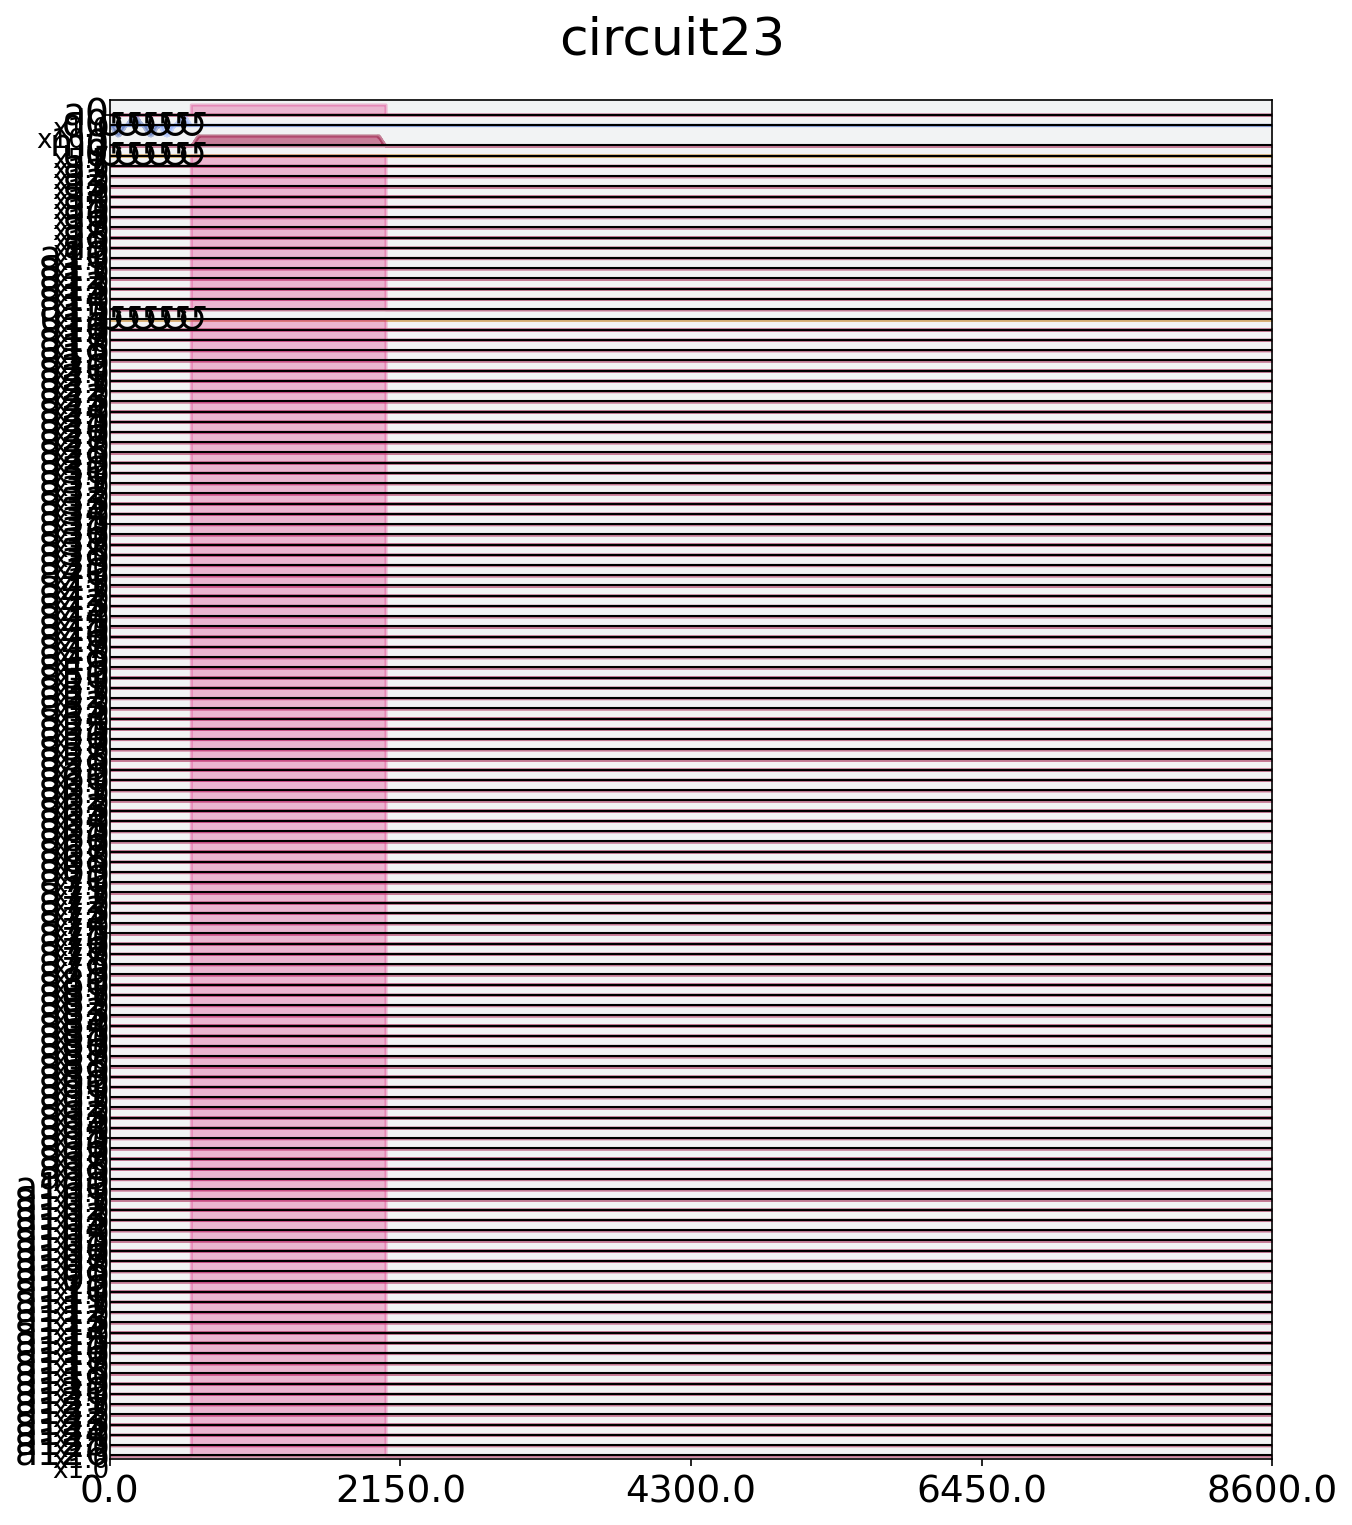

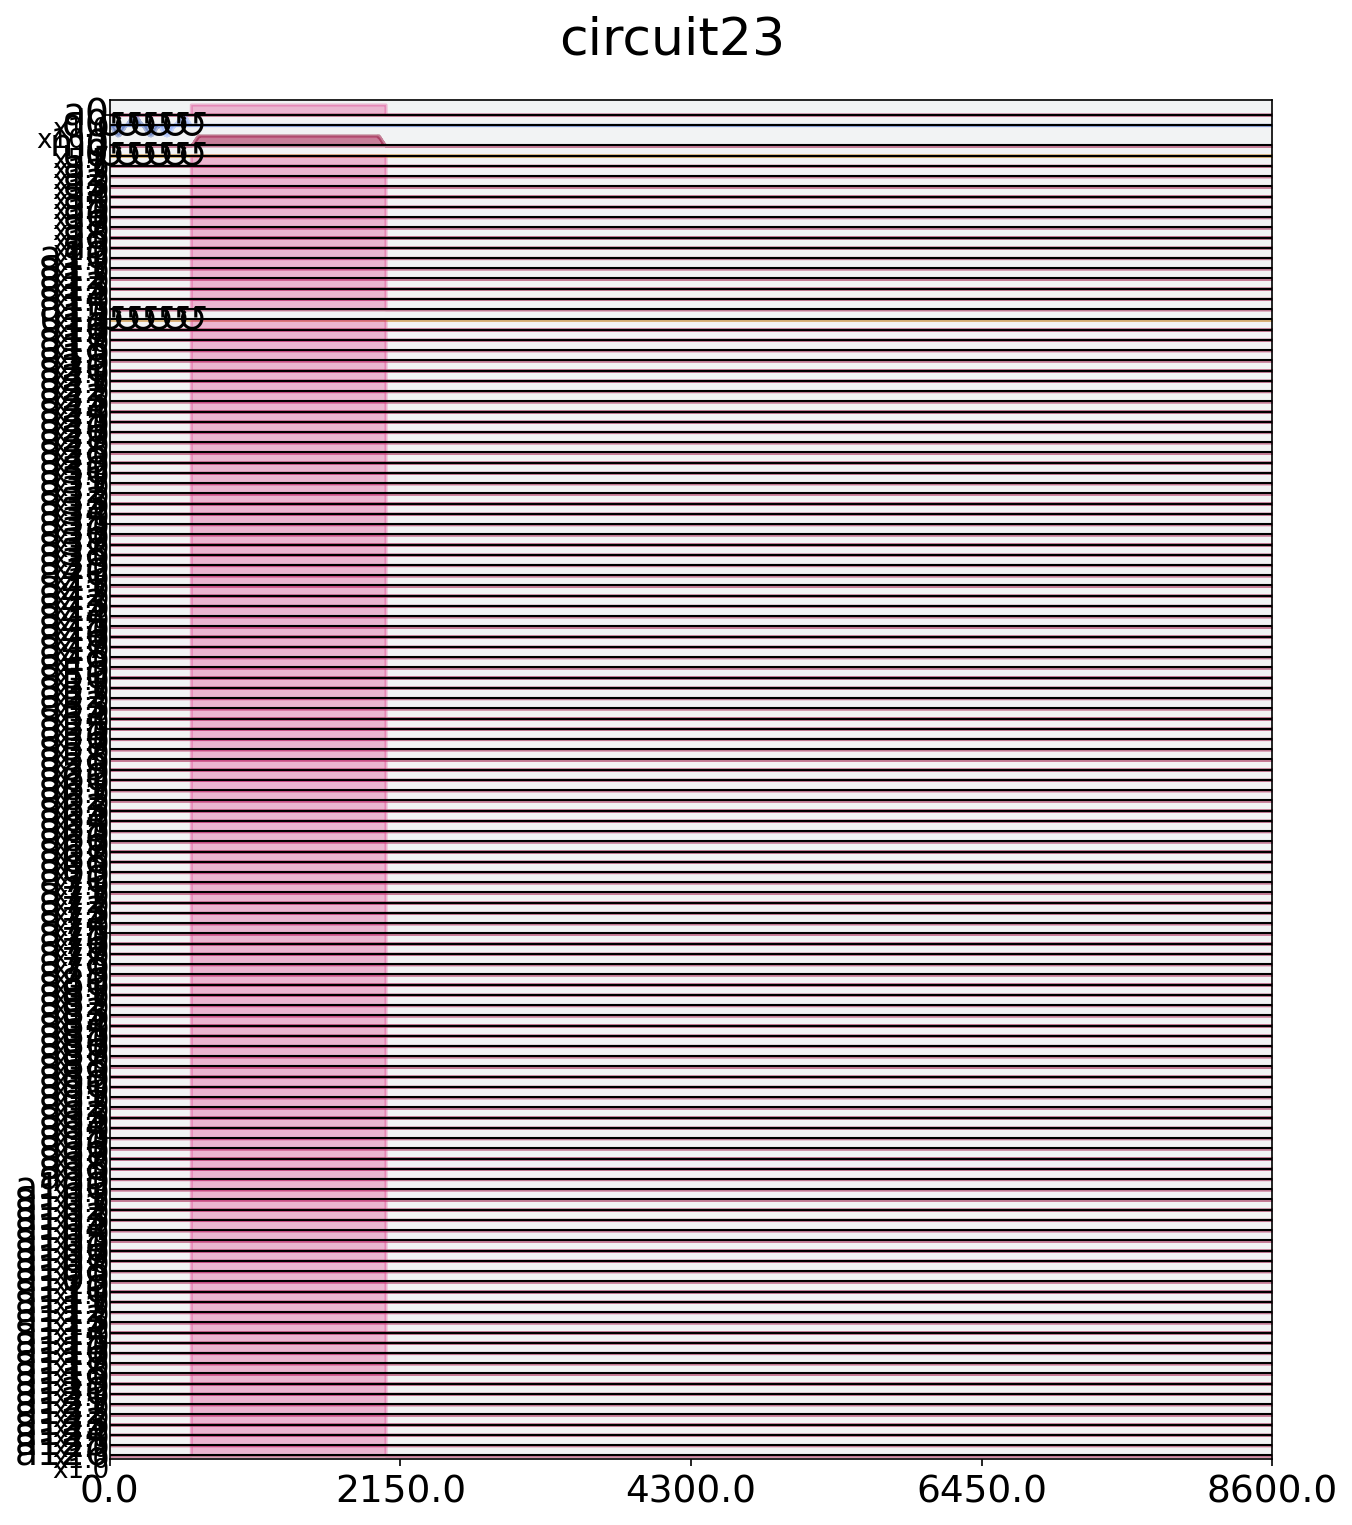

In [32]:
# p203 (p224 PDF)

#Create the circuit schedule using the transpiled circuit
circuit_schedule = schedule(transpiled_qc, backend)
#Draw the circuit
circuit_schedule.draw()


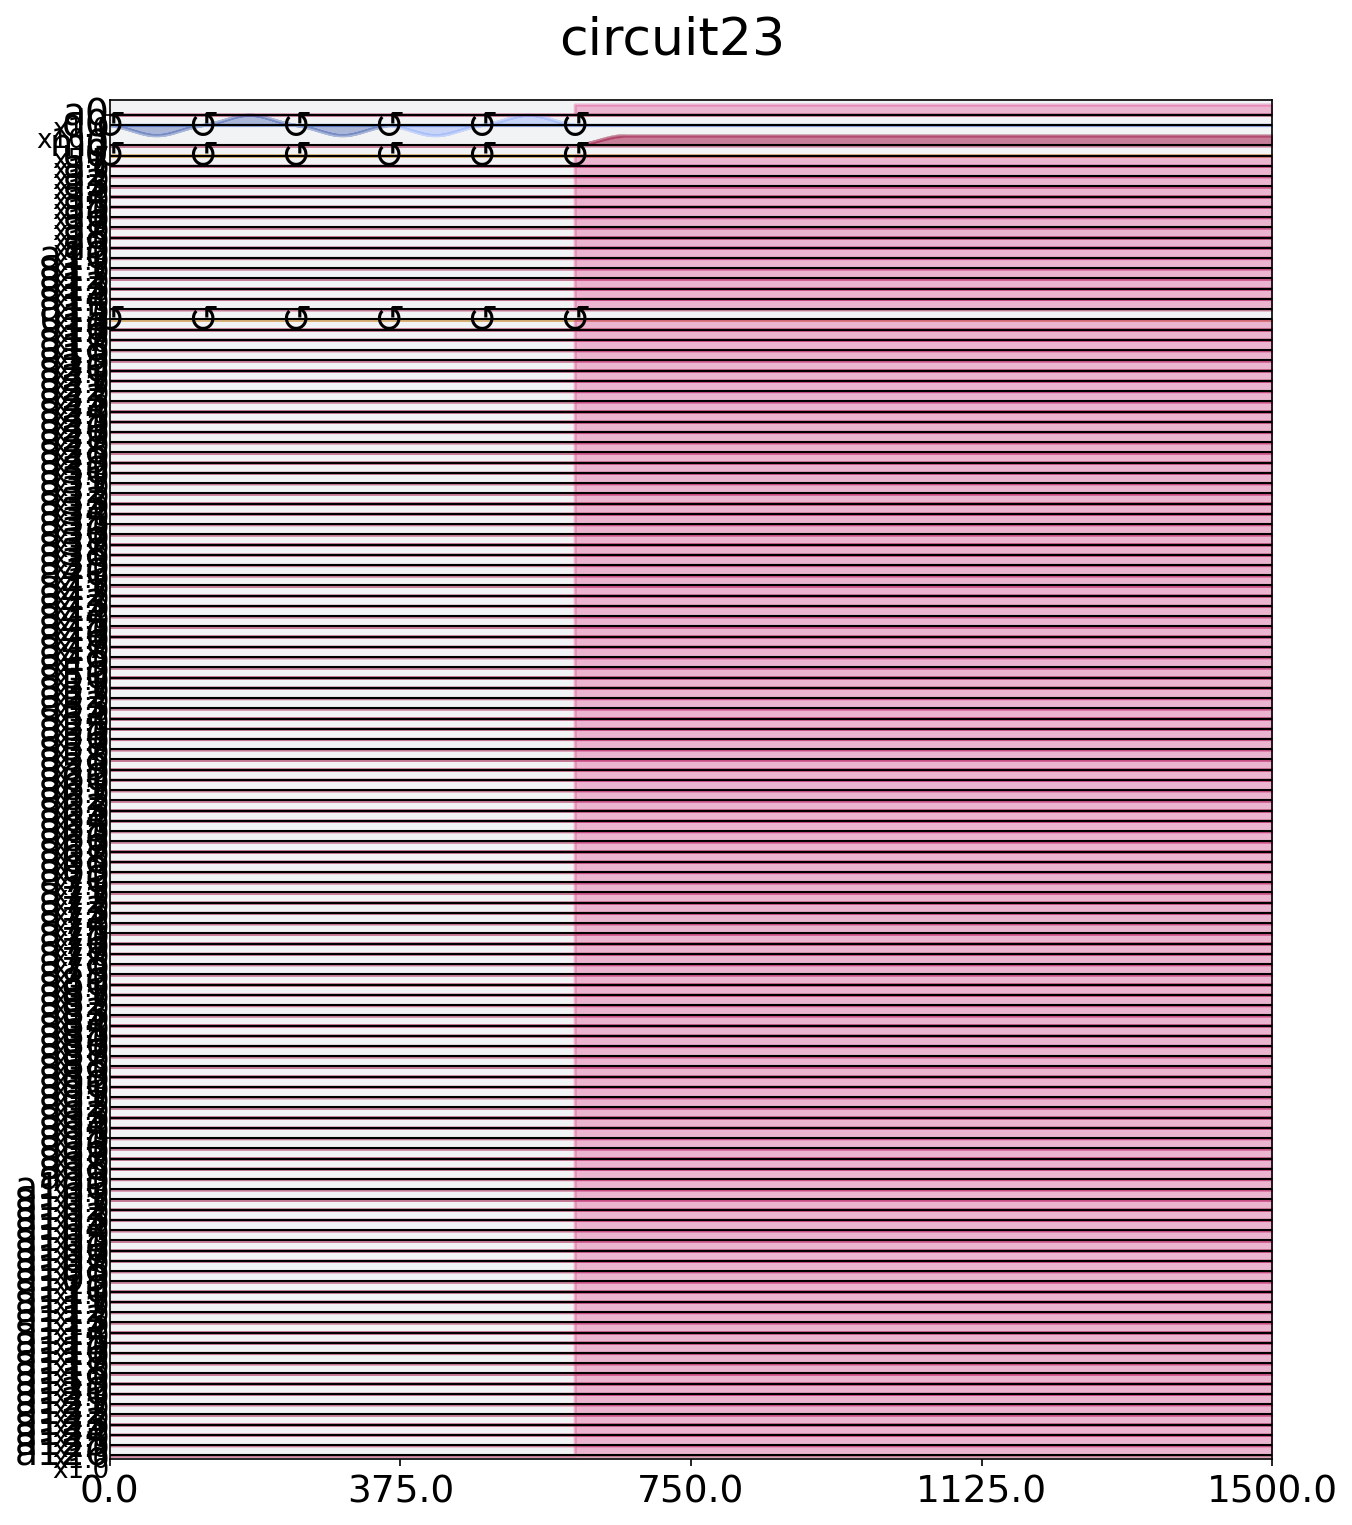

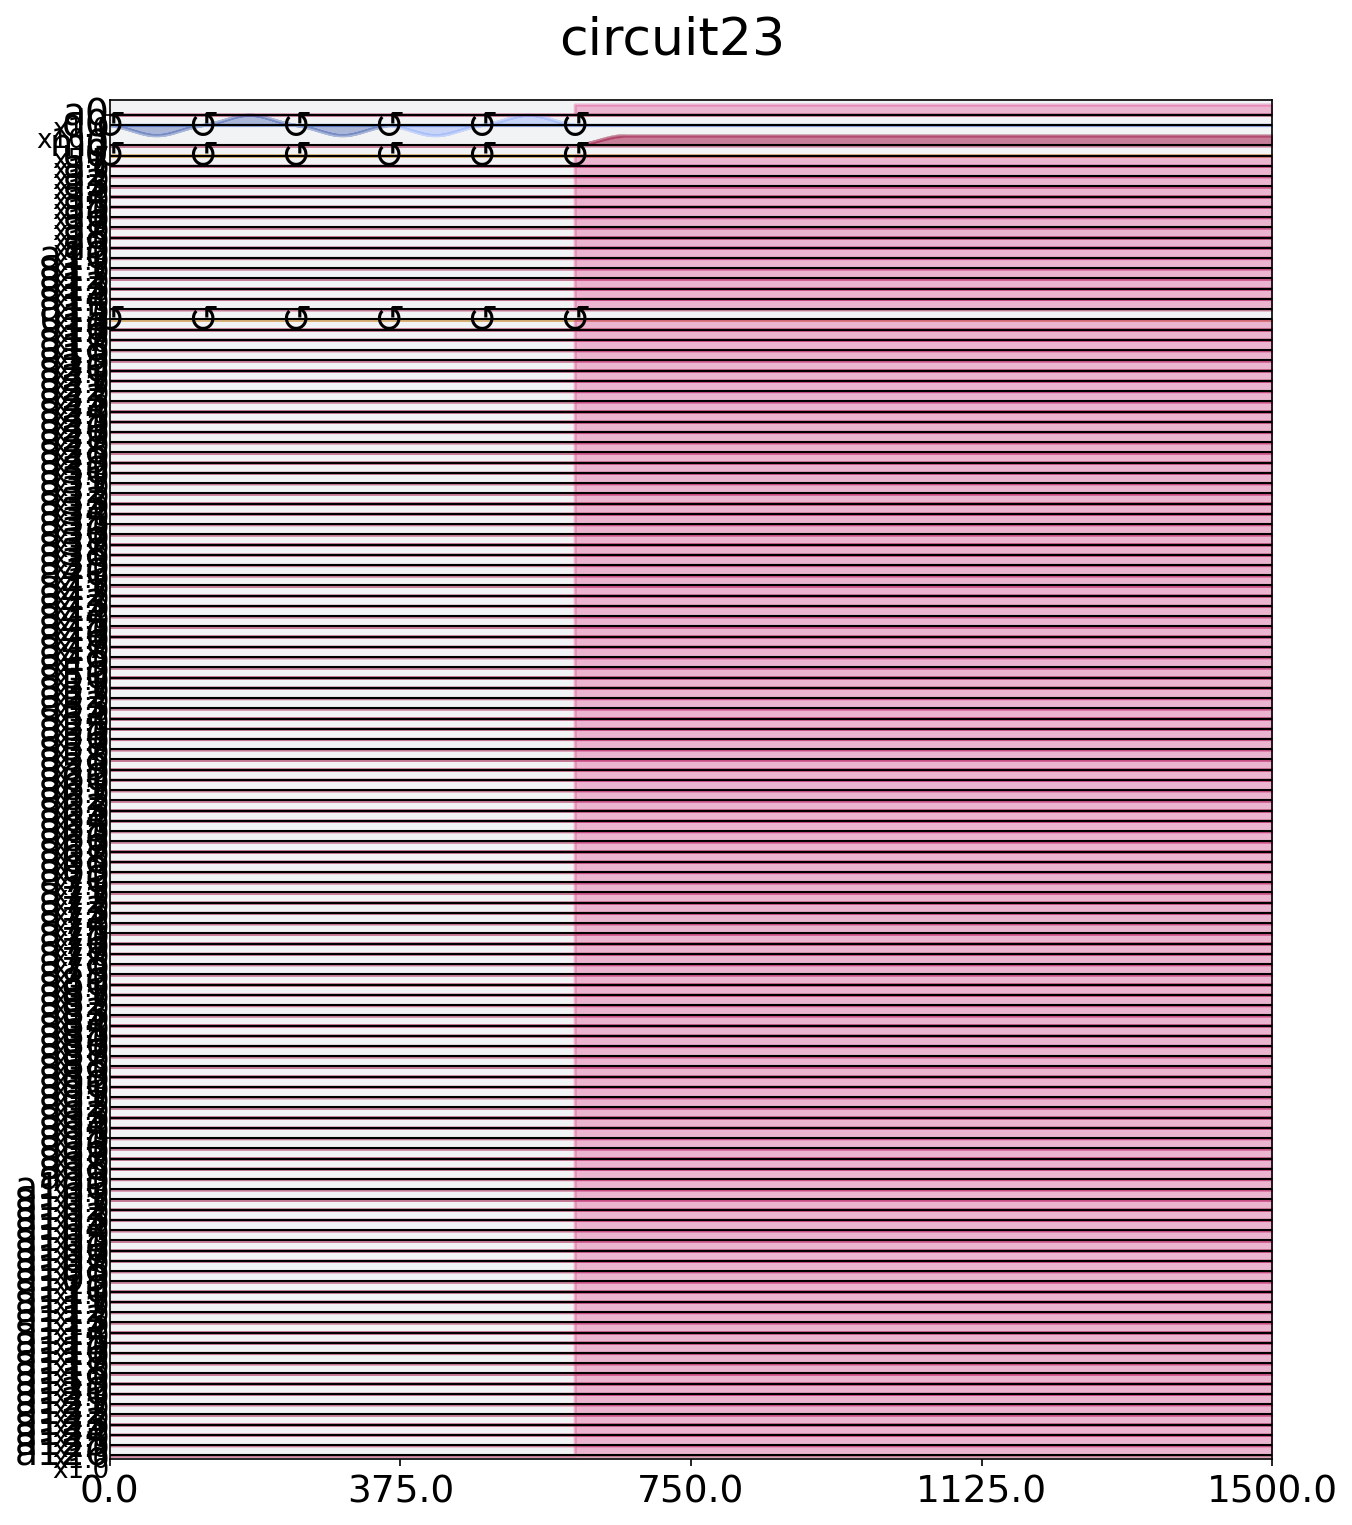

In [33]:
# p205 (p226 PDF)

#Draw the circuit with a shorter time range to ease visibility
circuit_schedule.draw(plot_range=[0, 1500])


In [34]:
# p206 (p227 PDF)

#Create a 2-qubit circuit
qc2 = QuantumCircuit(2, 2)
#Apply a Hadamard to the first qubit
qc2.h(0)
#Apply a CNOT gate where the Source is qubit 0, and Target qubit 1
qc2.cx(0, 1)
#Add measurement gates to all qubits
qc2.measure([0, 1], [0, 1])
#Draw the circuit
qc2.draw()


┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [35]:
# p207 (p228 PDF)

#Import the test backend
from qiskit.test.mock import FakeAlmaden
#Construct the backend
backend = FakeAlmaden()
#Transpile the circuit to the test backend and its basis states
transpiled_qc2 = transpile(qc2, backend)
#Draw the transpiled circuit
transpiled_qc2.draw()


┌──────────┐     ┌─┐   
        q_0 -> 0 ┤ U2(0,pi) ├──■──┤M├───
                 └──────────┘┌─┴─┐└╥┘┌─┐
        q_1 -> 1 ────────────┤ X ├─╫─┤M├
                             └───┘ ║ └╥┘
  ancilla_0 -> 2 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_1 -> 3 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_2 -> 4 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_3 -> 5 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_4 -> 6 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_5 -> 7 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_6 -> 8 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_7 -> 9 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_8 -> 10 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_9 -> 11 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_10 -> 12 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_11 -> 13 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_12 -> 14 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_13 -> 15 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_14 -> 16 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_15 -> 17 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_16 -> 18 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_17 -> 19 ──────────────────╫──╫─
                                   ║  ║ 
            c: 2/══════════════════╩══╩═
                                   0  1

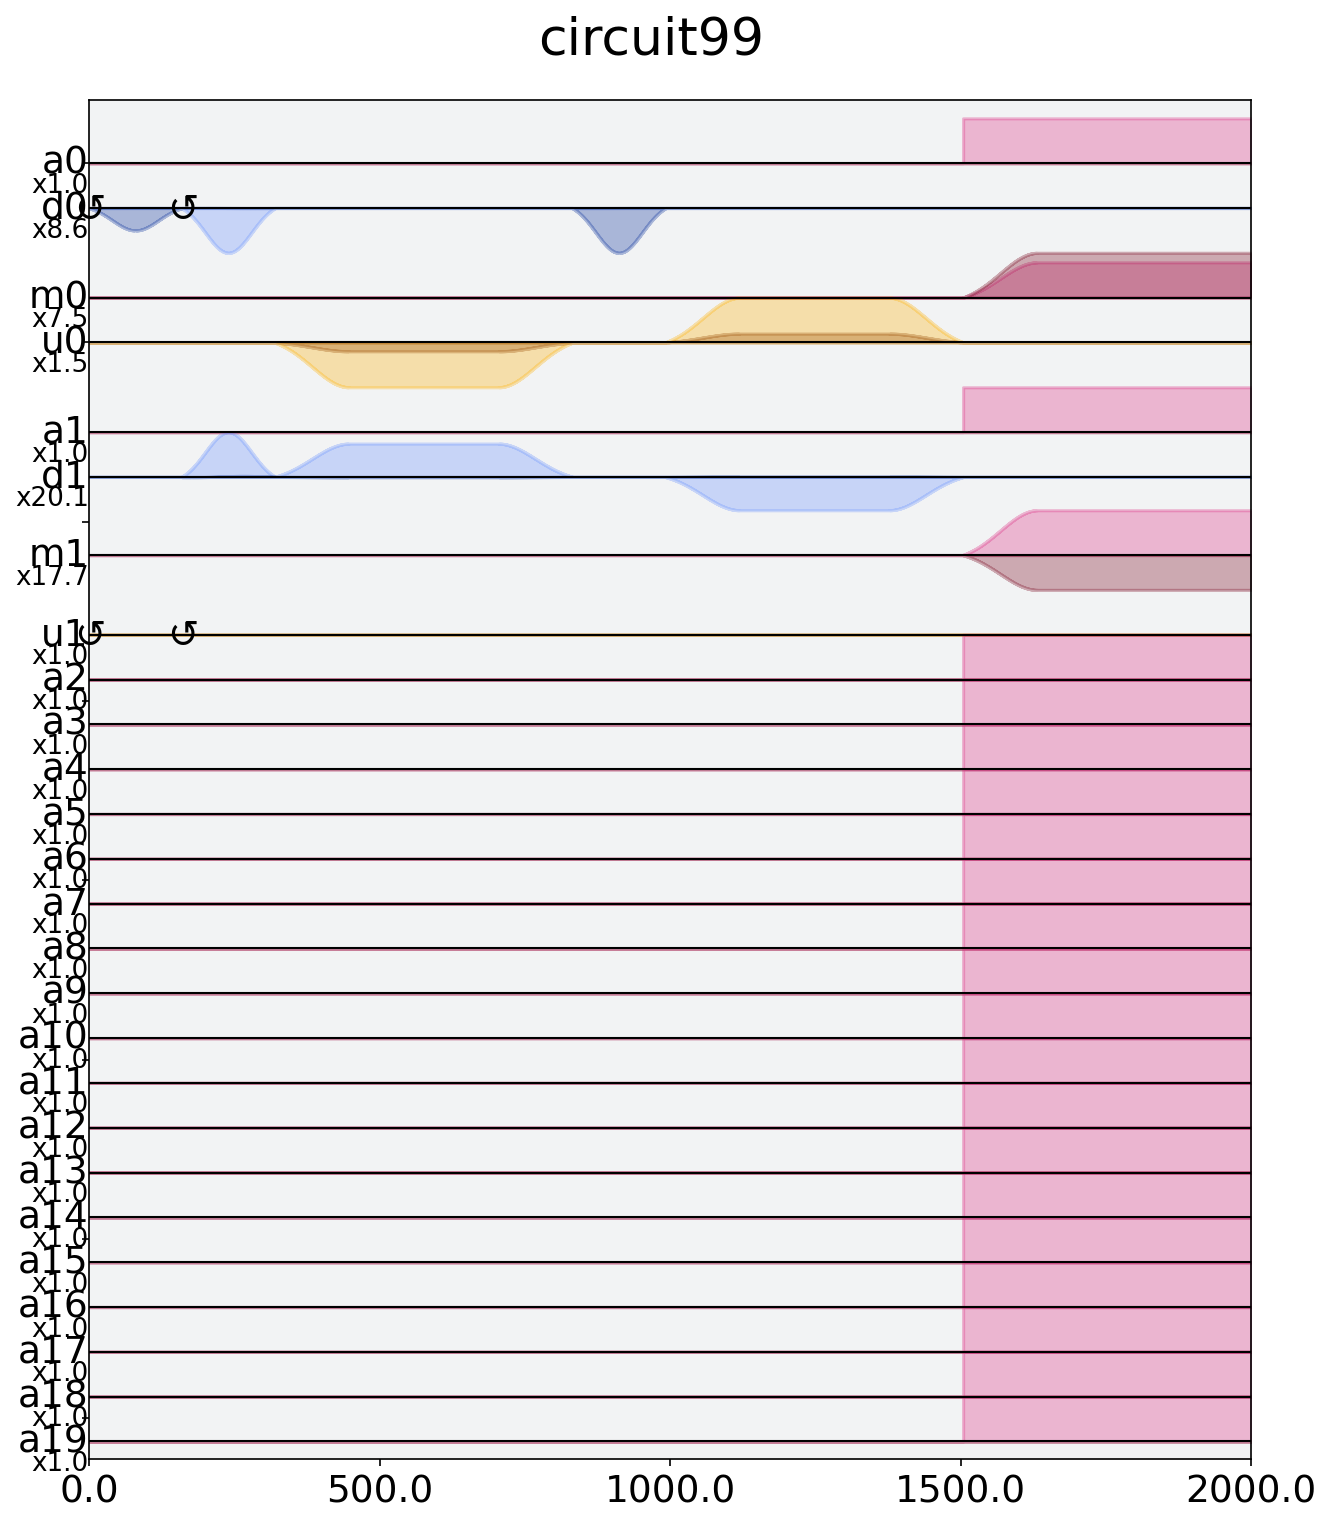

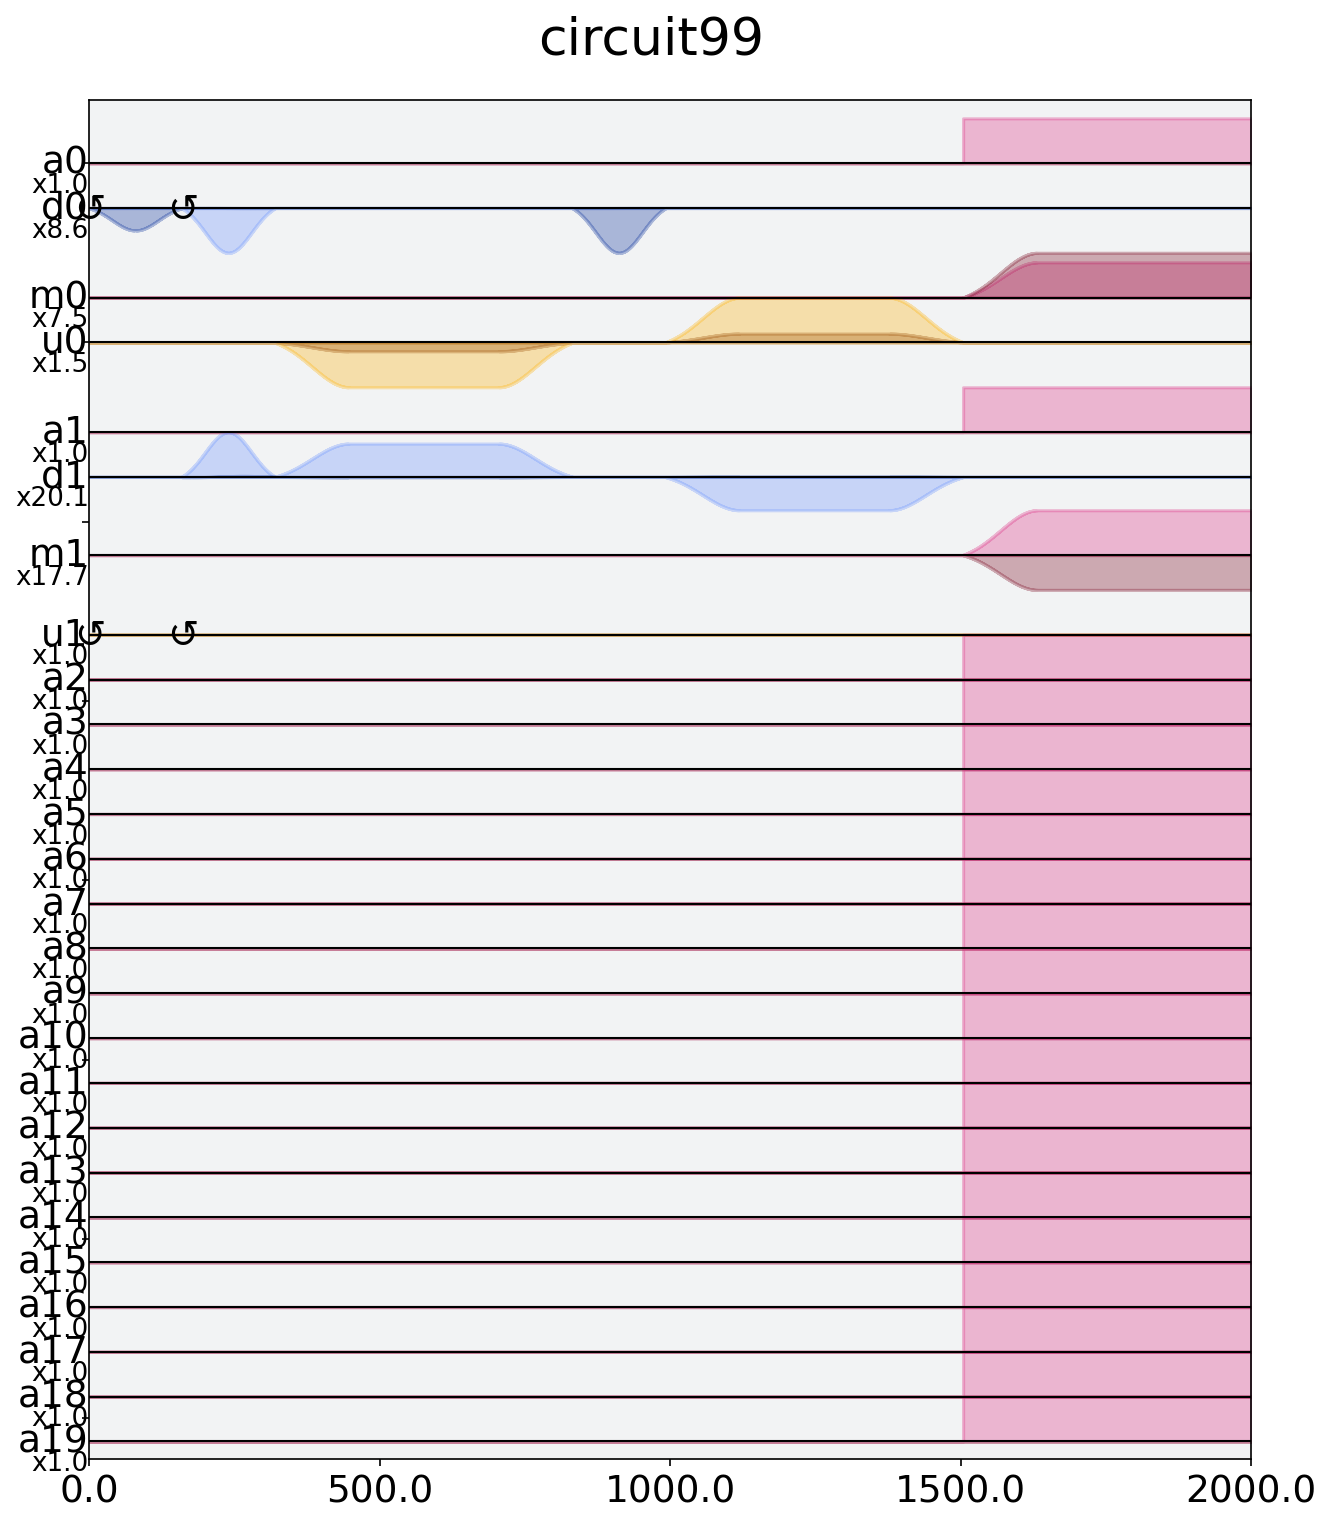

In [36]:
# p209 (p230 PDF)

#Create the circuit from the transpiled circuit results
circuit_schedule2 = schedule(transpiled_qc2, backend)
#Draw the 2-qubit circuit schedule with range of 2000 time steps
circuit_schedule2.draw(plot_range=[0, 2000])


# Leveraging Provider information

In [37]:
# p211 (p232 PDF)

#Import the IBMQ interface
from qiskit import IBMQ

#Save account ONLY needed if running on a local system for first time
#Uncomment below if running for the first time on a local machine.
#IBMQ.save_account('API_TOKEN') 

#Load the account which was saved on local system using save_account.
#Note: this is handled each time a Qiskit Notebook is loaded on IQX.
IBMQ.load_account()


ibmqfactory.load_account:WARNING:2023-11-23 13:49:46,136: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [43]:
# p212 (p233 PDF)

#Indicate a hub to link account to:
IBMQ.get_provider(hub='ibm-q')
#Indicate a project which your account is associated with
IBMQ.get_provider(project='my_project')


IBMQProviderError: 'No provider matches the specified criteria: hub = None, group = None, project = my_project'

In [40]:
# p212 (p233 PDF)

#Create the Provider object using the IBMQ interface 
provider = IBMQ.get_provider(group='open')
#Query the list of backends available to your account
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [41]:
# p213 (p234 PDF)

#Filter the list of backends to include only non-simulator, 
#and operational (meaning, not offline or under maintenance)
provider.backends(simulator=False, operational=True)


[<IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [45]:
# p214 (p235 PDF)

#Select a specific device from the provider
backend = provider.get_backend('ibm_brisbane')


In [46]:
# p214 (p235 PDF)

#Import the least_busy function
from qiskit.providers.ibmq import least_busy

#Identify the least busy devices 
#smaller than 6 qubits and not a simulator
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits < 6 and not x.configuration().simulator)
# 2023 update: sometimes there are only backends with at least 7 qubits so this line may throw an error

#Identify the least busy devices 
#larger than 6 qubits and not a simulator
large_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 6 and not x.configuration().simulator)

#Print the least busy devices
print('The least busy small devices: {}'.format(least_busy(small_devices)))
print('The least busy large devices: {}'.format(least_busy(large_devices)))


IBMQError: 'Unable to find the least_busy backend from an empty list.'

# Quantum backend components

In [56]:
# p216 (p237 PDF)

#Set ibmq_valencia as the backend, or whichever backend you wish
backend = provider.get_backend('ibm_brisbane')
#Confirm this is the backend selected by querying for its name,
backend.name()


'ibm_brisbane'

In [57]:
# p216 (p237 PDF)

#View the status of the backend
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print('Number of pending jobs in the queue: ', jobs_in_queue)


Number of pending jobs in the queue:  846


In [58]:
# p216 (p237 PDF)

#View the configuration of the backend
backend.configuration()
# backend  # 2023 update: this line is currently throwing an error on the local runthroughs


In [59]:
# p216 (p237 PDF)

# Display the number of qubits from the backend properties
backend.properties().qubits


[[Nduv(datetime.datetime(2023, 11, 22, 14, 3, 16, tzinfo=tzlocal()), T1, us, 296.0355784375139),
  Nduv(datetime.datetime(2023, 11, 23, 13, 4, 33, tzinfo=tzlocal()), T2, us, 78.55009541246288),
  Nduv(datetime.datetime(2023, 11, 23, 13, 53, 49, tzinfo=tzlocal()), frequency, GHz, 4.721874028116875),
  Nduv(datetime.datetime(2023, 11, 23, 13, 53, 49, tzinfo=tzlocal()), anharmonicity, GHz, -0.31197865973435573),
  Nduv(datetime.datetime(2023, 11, 23, 12, 36, 6, tzinfo=tzlocal()), readout_error, , 0.023600000000000065),
  Nduv(datetime.datetime(2023, 11, 23, 12, 36, 6, tzinfo=tzlocal()), prob_meas0_prep1, , 0.0264),
  Nduv(datetime.datetime(2023, 11, 23, 12, 36, 6, tzinfo=tzlocal()), prob_meas1_prep0, , 0.02080000000000004),
  Nduv(datetime.datetime(2023, 11, 23, 12, 36, 6, tzinfo=tzlocal()), readout_length, ns, 4000)],
 [Nduv(datetime.datetime(2023, 11, 18, 13, 2, 25, tzinfo=tzlocal()), T1, us, 246.62388508899448),
  Nduv(datetime.datetime(2023, 11, 23, 13, 16, 27, tzinfo=tzlocal()), T2, 

In [60]:
# p217 (p238 PDF)

#Print out the frequency of qubit (0)
print('Frequency of first qubit is: '+ str(backend.properties().frequency(0)))
#Print out the readout error of qubit (0)
print('Readout error of first qubit is: '+ str(backend.properties().readout_error(0)))


Frequency of first qubit is: 4721874028.116875
Readout error of first qubit is: 0.023600000000000065


In [61]:
# p217 (p238 PDF)

#Run a few jobs on this backend to generate jobs on the backend
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
for i in range(0,3):
    result = execute(qc, backend, shots=1024).result()

In [68]:
# p217 (p238 PDF)

#List out the last 3 jobs we ran on the device (2023 update: not currently working)
for executed_job in backend.jobs(limit=3):
    print('Job id: '
          + str(executed_job.job_id()) + ', ' 
          + str(executed_job.end_date) + ', ' 
          + str(executed_job.status()))


[]


# Understanding the Job component

(2023 update: the rest of this notebook is currently not working because the previous cell returns an empty list)

In [69]:
# p218 (p239 PDF)

#From the previous output of executed jobs, enter its job id.
job = backend.retrieve_job(executed_job.job_id())


NameError: name 'executed_job' is not defined

In [ ]:
# p218 (p239 PDF)

#Print the job instance status
job.status()


In [ ]:
# p218 (p239 PDF)

job.result()

In [ ]:
# p219 (p240 PDF)

job.backend()

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table